# Objective 1: Predict the Top 3 technology teams to be engaged to improve routing accuracy and time to engage

### Importing required libraries

In [10]:
# !pip install scikit-multilearn
# !pip install category_encoders
# !pip install neattext

In [11]:
import pandas as pd #Importing pandas library to perform calculations on dataframe
import numpy as np #Importing numpy module 
import matplotlib as plt #importing matplot library for visualizations
import datetime #Importing datetime for manipulations on datetime columns
from dateutil.relativedelta import relativedelta #to work on dates
from datetime import date 
import seaborn as sns #Importing seaborn for viusalizations
from matplotlib import pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk #natural language toolkit
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#Category encoders
import category_encoders as ce


#ML Packages
# ML Pkgs -  different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

#Libraries required for text mining
import warnings
warnings.filterwarnings("ignore")
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split ### Split Dataset into Train and Text

#Sparse Matrix
from scipy.sparse import csr_matrix
from scipy import sparse
from scipy.sparse import hstack

#Libraries required for showing accuracy metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
import re
import pickle
from tqdm import tqdm
import os
from collections import Counter


# Multi Label Pkgs
### Problem Transform
import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

[nltk_data] Downloading package punkt to C:\Users\Sai
[nltk_data]     Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Importing dataset 

#### uconn_dataset is the data provided for us

In [12]:
df = pd.read_excel(r"C:\Users\Sai Teja\Downloads\CourseWork\Capstone\Data\uconn_dataset.xlsx") #Importing csv file using read_csv function

#### business_service_imputation is an excel sheet created by us to impute business service missing values

In [13]:
bsi = pd.read_excel(r"C:\Users\Sai Teja\Downloads\CourseWork\Capstone\Data\business_service_imputation.xlsx") #Importing csv file using read_csv function

In [14]:
df.head() #Checking first 5 records using head function in pandas

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,SEVERITY,IMPACT,...,ASSIGNED_TO_SYS_ID,CAUSED_BY,RFC,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REOPENED_BY_SYS_ID,REOPENED_TIME,REASSIGNMENT_COUNT,U_OCC_ENGAGEMENT_METHOD
0,INC1319662,2021-05-31 10:12:19,2021-05-31 10:19:07,2021-06-14 11:00:10,Closed,NaN,False,3,3 - Low,3.0,...,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,NaN,0.0,0.0,NaN,NaT,0.0,NaN
1,INC1155199,2021-04-29 01:10:02,2021-04-29 01:13:07,2021-05-13 02:00:08,Closed,NaN,False,3,3 - Low,3.0,...,15350bc6db6d1494abcafb5aaf961940,NaN,NaN,NaN,0.0,0.0,NaN,NaT,0.0,NaN
2,INC0799260,2021-02-01 09:43:45,2021-02-01 09:52:07,2021-02-15 10:00:13,Closed,NaN,False,3,3 - Low,3.0,...,683a682a1b38a0103ec4c8092a4bcba2,NaN,NaN,NaN,0.0,0.0,NaN,NaT,0.0,NaN
3,INC0650904,2020-12-13 14:21:09,2020-12-14 12:34:26,2020-12-28 13:00:12,Closed,NaN,False,3,3 - Low,3.0,...,a42ab5fadbd44c90b47d54f9489619ed,NaN,NaN,INC0651688,0.0,0.0,NaN,NaT,0.0,NaN
4,INC1599254,2021-07-11 00:21:43,2021-07-11 02:56:16,2021-07-25 03:00:21,Closed,NaN,False,2,3 - Low,2.0,...,cce352f2db2714902bded487f496191f,NaN,NaN,NaN,0.0,0.0,NaN,NaT,2.0,NaN


In [15]:
df.columns #Analyzing the list of columns

Index(['NUMBER', 'OPENED_AT', 'RESOLVED_AT', 'SYS_UPDATED_ON', 'STATE',
       'MAJOR_INCIDENT_STATE', 'ACTIVE', 'PRIORITY', 'SEVERITY', 'IMPACT',
       'U_SIM_ENGAGED', 'U_SIM_MANAGER_SYS_ID', 'LOCATION', 'PROMOTED_ON',
       'PROMOTED_BY_SYS_ID', 'PROPOSED_ON', 'PROPOSED_BY_SYS_ID',
       'CALLER_ID_SYS_ID', 'CONTACT_TYPE', 'U_INC_CAT', 'TAGS',
       'SHORT_DESCRIPTION', 'DESCRIPTION', 'U_TEMPLATE_USED', 'CLOSE_CODE',
       'U_RESOLUTION_CODE', 'U_TEAM_SPECIFIC_CODE', 'RESOLVED_BY_SYS_ID',
       'CMDB_CI', 'BUSINESS_SERVICE', 'ASSIGNMENT_GROUP', 'ASSIGNED_TO_SYS_ID',
       'CAUSED_BY', 'RFC', 'PARENT_INCIDENT', 'CHILD_INCIDENTS',
       'REOPEN_COUNT', 'REOPENED_BY_SYS_ID', 'REOPENED_TIME',
       'REASSIGNMENT_COUNT', 'U_OCC_ENGAGEMENT_METHOD'],
      dtype='object')

#### The following counts represents null values for each column

In [16]:
df.isna().sum() 

NUMBER                          0
OPENED_AT                       0
RESOLVED_AT                 11101
SYS_UPDATED_ON                  0
STATE                           0
MAJOR_INCIDENT_STATE       327601
ACTIVE                          0
PRIORITY                       43
SEVERITY                        0
IMPACT                         44
U_SIM_ENGAGED                   0
U_SIM_MANAGER_SYS_ID       327768
LOCATION                   121538
PROMOTED_ON                327782
PROMOTED_BY_SYS_ID         327782
PROPOSED_ON                327922
PROPOSED_BY_SYS_ID         327924
CALLER_ID_SYS_ID                0
CONTACT_TYPE                 2127
U_INC_CAT                      15
TAGS                       326483
SHORT_DESCRIPTION               2
DESCRIPTION                    11
U_TEMPLATE_USED            293639
CLOSE_CODE                 197647
U_RESOLUTION_CODE           10461
U_TEAM_SPECIFIC_CODE        22583
RESOLVED_BY_SYS_ID         121739
CMDB_CI                      7337
BUSINESS_SERVI

#### Imputing Business Service values

In [17]:
df = df.merge(bsi, how = 'left', on =  'ASSIGNMENT_GROUP')
df['BUSINESS_SERVICE'] = df['BUSINESS_SERVICE_x'].combine_first(df.BUSINESS_SERVICE_y)
df["BUSINESS_SERVICE"].fillna("No Details", inplace = True) 

#### Dropping Insignificant Columns

In [18]:

#Initial analysis
df = df.drop([ 
         'SEVERITY', 
       'U_SIM_ENGAGED',
         'U_SIM_MANAGER_SYS_ID',  
         'PROMOTED_ON',
       'PROMOTED_BY_SYS_ID', \
         'PROPOSED_BY_SYS_ID',
       'CALLER_ID_SYS_ID', 
         'TAGS',
        'U_TEMPLATE_USED',
         'CLOSE_CODE',
       'U_RESOLUTION_CODE', 
         'U_TEAM_SPECIFIC_CODE',
         'RESOLVED_BY_SYS_ID',
       'CMDB_CI', 
         'ASSIGNED_TO_SYS_ID',
       'CAUSED_BY', 
         'RFC', 
         'REOPENED_BY_SYS_ID', 
         'REOPENED_TIME',
         'U_OCC_ENGAGEMENT_METHOD', 'BUSINESS_SERVICE_x', 'BUSINESS_SERVICE_y'],  axis = 1)

In [19]:
df.columns

Index(['NUMBER', 'OPENED_AT', 'RESOLVED_AT', 'SYS_UPDATED_ON', 'STATE',
       'MAJOR_INCIDENT_STATE', 'ACTIVE', 'PRIORITY', 'IMPACT', 'LOCATION',
       'PROPOSED_ON', 'CONTACT_TYPE', 'U_INC_CAT', 'SHORT_DESCRIPTION',
       'DESCRIPTION', 'ASSIGNMENT_GROUP', 'PARENT_INCIDENT', 'CHILD_INCIDENTS',
       'REOPEN_COUNT', 'REASSIGNMENT_COUNT', 'BUSINESS_SERVICE'],
      dtype='object')

In [20]:
df.head()

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,IMPACT,LOCATION,...,CONTACT_TYPE,U_INC_CAT,SHORT_DESCRIPTION,DESCRIPTION,ASSIGNMENT_GROUP,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE
0,INC1319662,2021-05-31 10:12:19,2021-05-31 10:19:07,2021-06-14 11:00:10,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,Alert,Failure > Alert,MANAGEMENT AGENT LOST,Device ciloracd2022 of type Host_systemEDGE is...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management
1,INC1155199,2021-04-29 01:10:02,2021-04-29 01:13:07,2021-05-13 02:00:08,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,Alert,Failure > Alert,MANAGEMENT AGENT LOST,Device cvwiisxp00180. of type Host_systemEDGE ...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management
2,INC0799260,2021-02-01 09:43:45,2021-02-01 09:52:07,2021-02-15 10:00:13,Closed,NaN,False,3,3.0,NaN,...,Alert,Failure > Alert,MANAGEMENT AGENT LOST,Device <DOMAIN_NAME> of type Host_systemEDGE i...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management
3,INC0650904,2020-12-13 14:21:09,2020-12-14 12:34:26,2020-12-28 13:00:12,Closed,NaN,False,3,3.0,NaN,...,CA SOI,Failure > Alert,MANAGEMENT AGENT LOST,A Major alarm was generated in SOI at Event Ti...,SystemsMgmtProducts,INC0651688,0.0,0.0,0.0,Systems Management
4,INC1599254,2021-07-11 00:21:43,2021-07-11 02:56:16,2021-07-25 03:00:21,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,Alert,Failure > Alert,Synthetic failure -Specialty Script Gateway UR...,Monitor Name:Specialty Script Gateway URL: htt...,EOCC Event Management,NaN,0.0,0.0,2.0,CIGNA Directory Services


#### Conversion of datetime datatypes and calculation of resolution time. Parsing Category, Sub-category and Location


In [21]:
df['OPENED_AT'] = pd.to_datetime(df['OPENED_AT'])  #Datetime function converts string field to datetime format
df['RESOLVED_AT'] = pd.to_datetime(df['RESOLVED_AT'])

In [22]:
from dateutil.relativedelta import relativedelta 

In [23]:
df['Difference'] = (df['RESOLVED_AT'] - df['OPENED_AT']).astype('timedelta64[m]')

1.   Splitting Incident Category. Fetching first part and last part.
2.   Splitting Location based on delimiter ":" and fetching last part (which is actual city name)

In [24]:
df["Incident_Category_1"] = df['U_INC_CAT'].str.split('>').str[0]
df["Incident_Sub_Category_1"] = df['U_INC_CAT'].str.split('>').str[-1]
df["CITY"] = df['LOCATION'].str.split(':').str[-1]
df.head(10)

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,IMPACT,LOCATION,...,ASSIGNMENT_GROUP,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE,Difference,Incident_Category_1,Incident_Sub_Category_1,CITY
0,INC1319662,2021-05-31 10:12:19,2021-05-31 10:19:07,2021-06-14 11:00:10,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management,6.0,Failure,Alert,Windsor
1,INC1155199,2021-04-29 01:10:02,2021-04-29 01:13:07,2021-05-13 02:00:08,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management,3.0,Failure,Alert,Windsor
2,INC0799260,2021-02-01 09:43:45,2021-02-01 09:52:07,2021-02-15 10:00:13,Closed,NaN,False,3,3.0,NaN,...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management,8.0,Failure,Alert,NaN
3,INC0650904,2020-12-13 14:21:09,2020-12-14 12:34:26,2020-12-28 13:00:12,Closed,NaN,False,3,3.0,NaN,...,SystemsMgmtProducts,INC0651688,0.0,0.0,0.0,Systems Management,1333.0,Failure,Alert,NaN
4,INC1599254,2021-07-11 00:21:43,2021-07-11 02:56:16,2021-07-25 03:00:21,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,EOCC Event Management,NaN,0.0,0.0,2.0,CIGNA Directory Services,154.0,Failure,Alert,Windsor
5,INC0251612,2020-08-19 11:22:42,NaT,2020-08-19 11:32:12,Canceled,NaN,False,2,2.0,NaN,...,Global SAN LII Support,NaN,0.0,0.0,0.0,Storage,NaN,Failure,Alert,NaN
6,INC0900803,2021-03-01 00:48:28,2021-03-01 00:52:55,2021-03-15 02:00:02,Closed,NaN,False,3,3.0,NaN,...,SystemsMgmtProducts,NaN,0.0,0.0,0.0,Systems Management,4.0,Failure,Alert,NaN
7,INC1370239,2021-06-07 23:05:06,2021-06-21 22:35:53,2021-07-05 23:00:05,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,DBA - Oracle,NaN,0.0,0.0,0.0,No Details,20130.0,Failure,Alert,Windsor
8,INC1408464,2021-06-13 21:13:31,2021-06-13 21:19:36,2021-06-17 19:29:13,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,EOCC - Mainframe Event Management,NaN,0.0,0.0,0.0,Batch Jobs,6.0,Failure,Alert,Windsor
9,INC0174188,2020-07-25 23:05:00,2020-07-26 02:08:48,2020-08-09 03:00:09,Closed,NaN,False,2,2.0,NaN,...,PROD SVC DB Alerting - Oracle,INC0174208,0.0,0.0,0.0,SDS-Oracle,183.0,Failure,Alert,NaN


In [25]:
df.describe()

,IMPACT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,Difference
count,328196.000000,328236.000000,328236.000000,328236.000000,317139.000000
mean,2.762959,0.164632,0.033741,0.396471,2656.941515
std,0.628549,4.686360,0.340311,0.816559,11770.371654
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,9.000000
50%,3.000000,0.000000,0.000000,0.000000,96.000000
75%,3.000000,0.000000,0.000000,1.000000,803.000000
max,4.000000,1144.000000,106.000000,24.000000,483852.000000


In [26]:
df.isnull().sum()

NUMBER                          0
OPENED_AT                       0
RESOLVED_AT                 11101
SYS_UPDATED_ON                  0
STATE                           0
MAJOR_INCIDENT_STATE       327601
ACTIVE                          0
PRIORITY                       43
IMPACT                         44
LOCATION                   121538
PROPOSED_ON                327922
CONTACT_TYPE                 2127
U_INC_CAT                      15
SHORT_DESCRIPTION               2
DESCRIPTION                    11
ASSIGNMENT_GROUP                4
PARENT_INCIDENT            274240
CHILD_INCIDENTS                 4
REOPEN_COUNT                    4
REASSIGNMENT_COUNT              4
BUSINESS_SERVICE                0
Difference                  11101
Incident_Category_1            15
Incident_Sub_Category_1        15
CITY                       121538
dtype: int64

#### Outlier Analysis based on Difference column (Resolution Time)

<AxesSubplot:ylabel='Difference'>

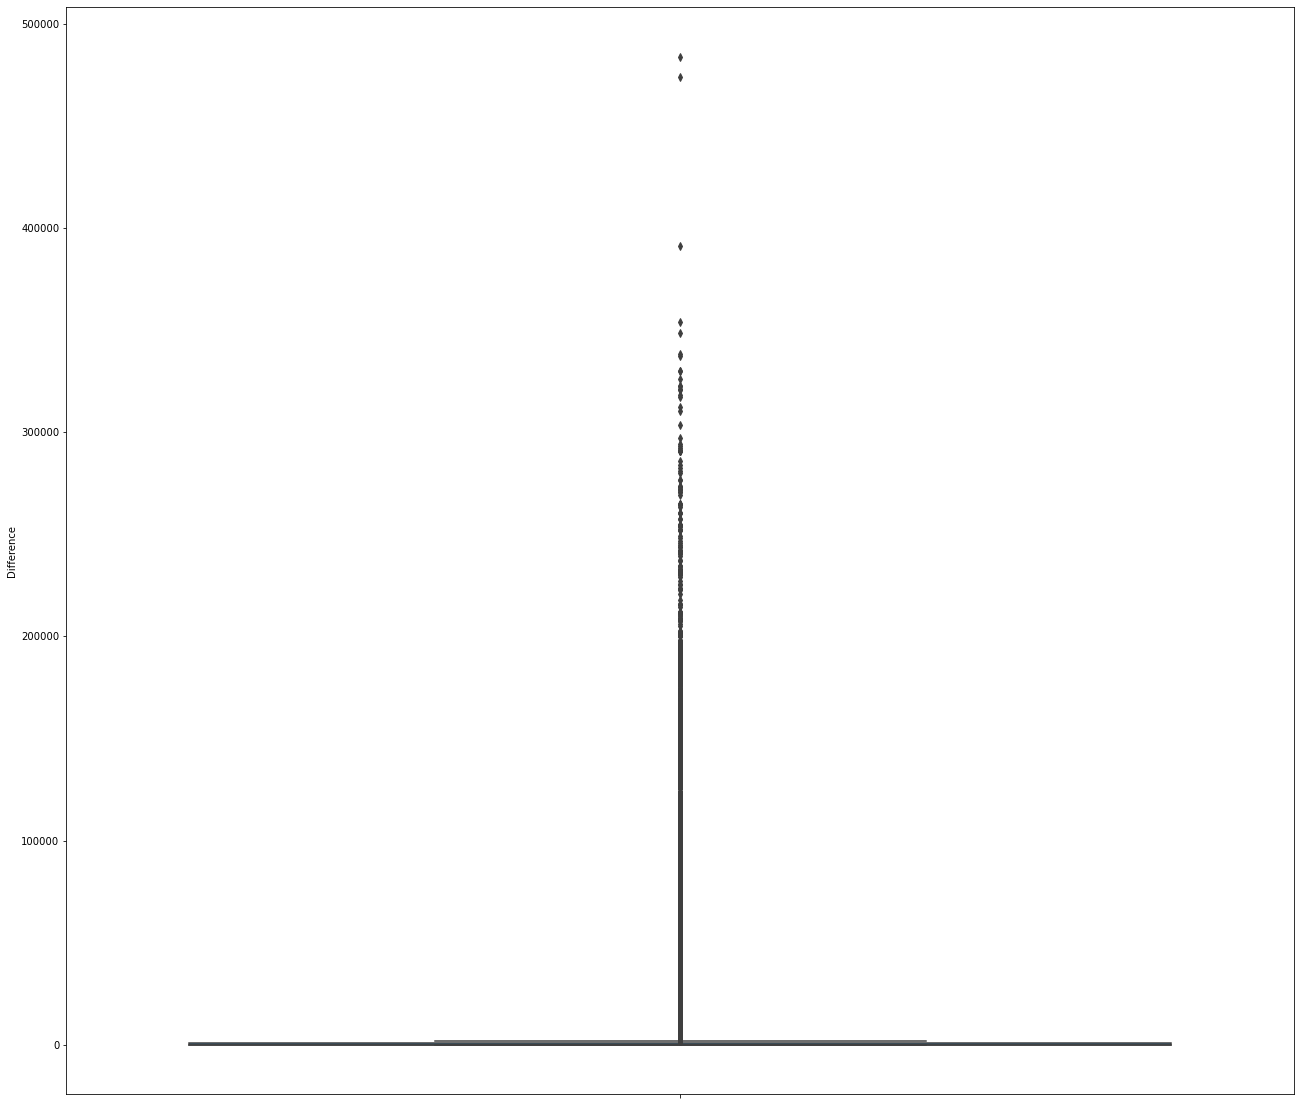

In [27]:
fig, axes = plt.subplots(1,1, figsize=(22,20)) #Preparing 8 sub plots with size 22, 20 

sns.boxplot(y=df["Difference"])

#### User-defined function to calculate upperbound value

In [28]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75]) # calculates the values at 25th and 75th quartile ranges
 IQR = Q3 - Q1
 #lower_range = Q1 - (3 * IQR)
 upper_range = Q3 + (3 * IQR)
 return upper_range

In [29]:
upperbound = outlier_treatment(df[~df['Difference'].isna()]['Difference']) 
upperbound #Upper bound value for difference column

3185.0

#### Forming new data frame for outliers and fetch top 5 slows teams based on count. Average time is also shown in a table

In [30]:
outlier_df = df[df["Difference"] > upperbound]

In [31]:
outlier_df.head()

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,IMPACT,LOCATION,...,ASSIGNMENT_GROUP,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE,Difference,Incident_Category_1,Incident_Sub_Category_1,CITY
7,INC1370239,2021-06-07 23:05:06,2021-06-21 22:35:53,2021-07-05 23:00:05,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,DBA - Oracle,NaN,0.0,0.0,0.0,No Details,20130.0,Failure,Alert,Windsor
10,INC0202628,2020-08-03 22:37:27,2020-08-12 04:43:53,2020-08-26 05:00:12,Closed,NaN,False,3,3.0,NaN,...,Global Linux L2 Support,INC0197702,0.0,0.0,1.0,Infrastructure Platform Services,11886.0,Failure,Alert,NaN
12,INC1347506,2021-06-03 20:07:32,2021-06-10 20:16:10,2021-06-24 21:00:12,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,NAS LII Support,NaN,0.0,0.0,0.0,AIS - Enterprise Messaging,10088.0,Failure,Alert,Windsor
20,INC0521542,2020-11-04 11:50:48,2020-11-13 10:10:07,2020-11-27 11:00:11,Closed,NaN,False,3,3.0,GBRGRNK001:Greenock,...,INTL UK WEB Support,NaN,0.0,0.0,0.0,No Details,12859.0,Failure,Function or Feature Not Working,Greenock
24,INC1107830,2021-04-17 16:32:13,2021-04-22 06:51:58,2021-05-06 07:00:05,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,Linux,NaN,0.0,0.0,0.0,Infrastructure Platform Services,6619.0,Failure,Alert,Windsor


In [32]:
outlier_df["Difference"].describe()

count     43012.000000
mean      17550.326537
std       27616.297393
min        3186.000000
25%        5184.000000
50%        8997.000000
75%       16903.000000
max      483852.000000
Name: Difference, dtype: float64

In [33]:
outlier_avgtime = pd.DataFrame(outlier_df.groupby("ASSIGNMENT_GROUP")["Difference"].mean()).reset_index() # calculating sum of amount for each sector
outlier_avgtime.sort_values("Difference", ascending = False, inplace=True) # 
outlier_avgtime # 

,ASSIGNMENT_GROUP,Difference
293,SM Administration,270695.000000
7,AIS Kafka Engineering,217735.000000
204,ISG RM,187383.000000
90,Data Network Support Auto,147243.500000
105,ENE Capacity Planning Project Support,146432.666667
...,...,...
94,Database Services Delivery PostgreSQL,3867.500000
114,EOCC Analytics,3844.000000
177,INTL CISEL OPS - Infra,3742.500000
299,Server Support,3733.000000


#### Plot 1: This graph shows top 5 Outlier Assignment Group by count of records

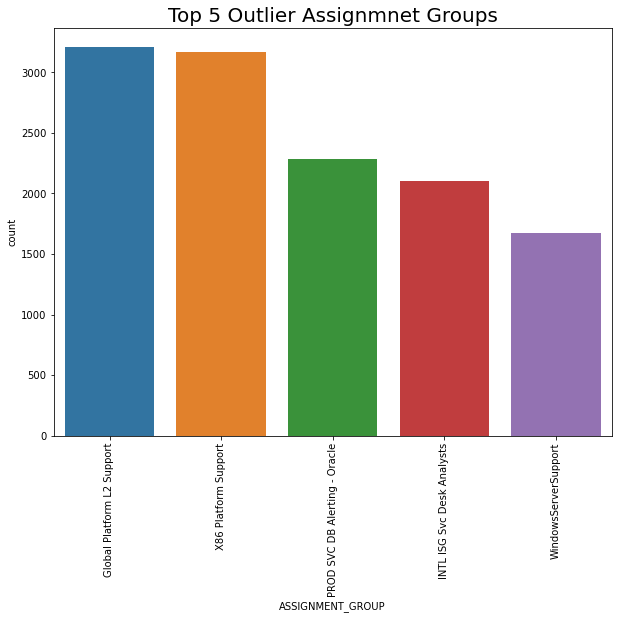

In [34]:
plt.figure(figsize=(10,7.5)) #Configuring plot size
p1 = sns.countplot(data= outlier_df,x='ASSIGNMENT_GROUP', order=outlier_df.ASSIGNMENT_GROUP.value_counts().iloc[:5].index) #count plot using sea born module
p1.set_xticklabels(p1.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p1.set_title("Top 5 Outlier Assignmnet Groups", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Fetching top 10 groups by avergare resolution  time and count from outlier data for text mining analysis.

In [35]:
outlier_groups = list(outlier_avgtime["ASSIGNMENT_GROUP"].iloc[0:10])
outlier_groups

['SM Administration',
 'AIS Kafka Engineering',
 'ISG RM',
 'Data Network Support Auto',
 'ENE Capacity Planning Project Support',
 'ENE Core Services',
 'Cloud CoE AWS Engineering',
 'ERA Disaster Recovery',
 'ERA Configuration Team',
 'CNOC']

In [36]:
outlier_groups_count = pd.DataFrame(outlier_df.groupby("ASSIGNMENT_GROUP")["NUMBER"].count()) # calculating sum of amount for each sector
outlier_groups_count.sort_values("NUMBER", ascending = False, inplace=True) # 
outlier_groups_count_list = list(outlier_groups_count.index)[0:10]
outlier_groups_count_list

['Global Platform L2 Support',
 'X86 Platform Support',
 'PROD SVC DB Alerting - Oracle',
 'INTL ISG Svc Desk Analysts',
 'WindowsServerSupport',
 'INTL UK WEB Support',
 'NetServ Eworker RAS',
 'Global SAN LII Support',
 'InformationMgmtProd',
 'ENE Proxy Services']

#### This table represents avg time of top 10 outlier groups by count. This table is used in presentation Appendix.

In [37]:
outlier_avgtime[outlier_avgtime['ASSIGNMENT_GROUP'].isin(outlier_groups_count_list)]

,ASSIGNMENT_GROUP,Difference
111,ENE Proxy Services,38907.034515
211,InformationMgmtProd,19308.822447
200,INTL UK WEB Support,17252.373973
157,Global Platform L2 Support,17246.227315
318,WindowsServerSupport,17030.155635
320,X86 Platform Support,13242.761274
191,INTL ISG Svc Desk Analysts,12666.558670
158,Global SAN LII Support,9171.768103
263,PROD SVC DB Alerting - Oracle,8811.853584
239,NetServ Eworker RAS,5508.526613


#### Plot 2: Forminng a new data frame excluding outliers and analyzing distribution of resolution time using Box plot

In [38]:
df_wordanalysis = df[df["Difference"] < upperbound]

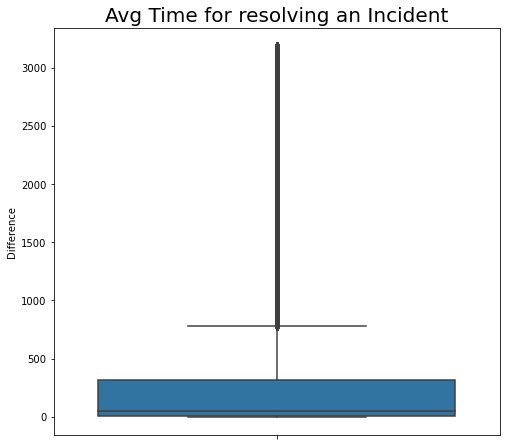

In [39]:
plt.figure(figsize=(8,7.5)) #Configuring plot size
p2 = sns.boxplot( y='Difference' , data= df_wordanalysis ) #count plot using sea born module
p2.set_xticklabels(p2.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p2.set_title("Avg Time for resolving an Incident", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot 1


***Around 49% of the incidents (159904) were resolved within 100 mins***

In [40]:
len(df[(df['Difference'] < 100)]) #Around 50% of the incidents were solved with in 100 minutes

159904

***Forming a Data Frame "avgtime" to represent average difference time for each Assignment Group***

***The dataframe is used to represent slow and fast teams. We will extract list slow and fast teams list for further text analytics***

In [41]:
avgtime = pd.DataFrame(df_wordanalysis.groupby("ASSIGNMENT_GROUP")["Difference"].mean()) # calculating sum of amount for each sector
avgtime.sort_values("Difference", ascending = False, inplace=True) # 
avgtime.head(10) # 


,Difference
ASSIGNMENT_GROUP,
ODS-OPS Support,3045.000000
EOCC Analytics,2988.000000
PROD SVC DBA-L3 Postgres,2718.000000
IPM PPD,2386.000000
ISGAutomation,2309.625000
CM ENE ISE Services,2085.600000
ADC Data Center Engineering,1964.000000
GSS HGS Philippines,1949.833333
Global Linux L2 Support Project Support,1922.000000


In [42]:
avgtime["Assignment_Group"] = avgtime.index
avgtime.reset_index()

,ASSIGNMENT_GROUP,Difference,Assignment_Group
0,ODS-OPS Support,3045.000000,ODS-OPS Support
1,EOCC Analytics,2988.000000,EOCC Analytics
2,PROD SVC DBA-L3 Postgres,2718.000000,PROD SVC DBA-L3 Postgres
3,IPM PPD,2386.000000,IPM PPD
4,ISGAutomation,2309.625000,ISGAutomation
...,...,...,...
311,Disaster Recovery,10.786885,Disaster Recovery
312,AIS Integration Services Engineering,10.500000,AIS Integration Services Engineering
313,ENE Core Services,4.500000,ENE Core Services
314,ERA Disaster Recovery,4.000000,ERA Disaster Recovery


In [43]:
slow_groups = list(avgtime["Assignment_Group"].iloc[0:10])
slow_groups

['ODS-OPS Support',
 'EOCC Analytics',
 'PROD SVC DBA-L3 Postgres',
 'IPM PPD',
 'ISGAutomation',
 'CM ENE ISE Services',
 'ADC Data Center Engineering',
 'GSS HGS Philippines',
 'Global Linux L2 Support Project Support',
 'Mainframe Reliability']

#### Plot 3 represents Top 10 Slow Teams based on Average Resolution Time

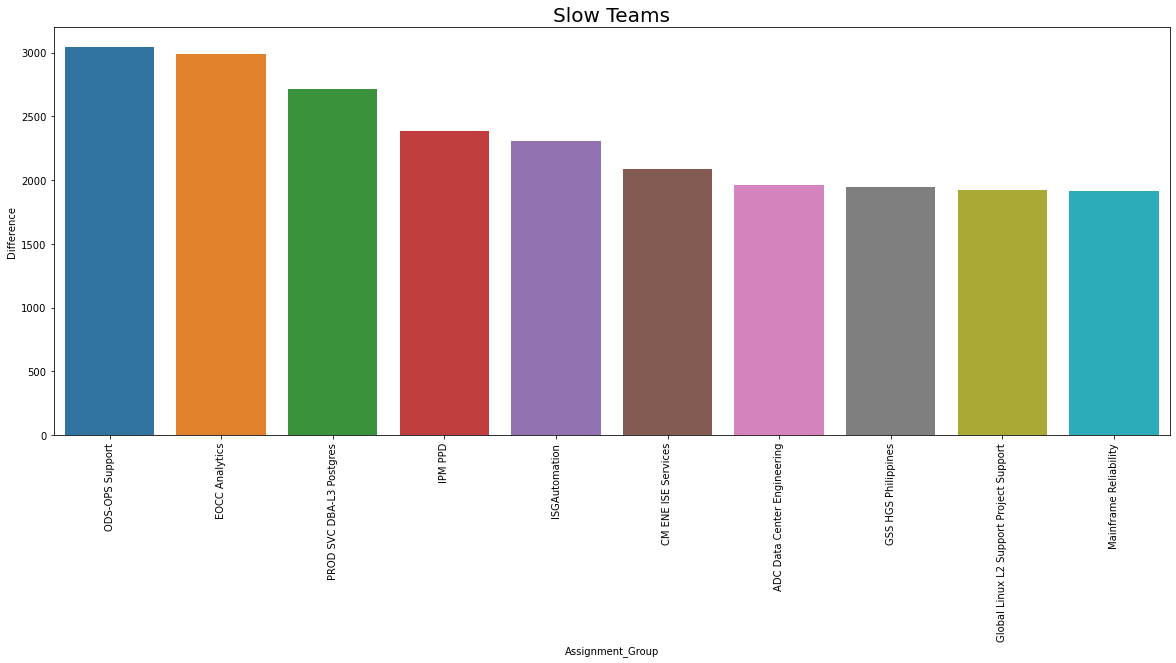

In [44]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p3 = sns.barplot(x= "Assignment_Group", y='Difference' , data=avgtime.iloc[0:10] ) #count plot using sea born module
p3.set_xticklabels(p3.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p3.set_title("Slow Teams", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot 1

***Changing the order to fetch the fast teams from avgtime dataframe***

In [45]:
avgtime.sort_values("Difference", ascending = True, inplace=True) #
avgtime["ASSIGNMENT_GROUP"] = avgtime.index
avgtime.head(10) # 

,Difference,Assignment_Group,ASSIGNMENT_GROUP
ASSIGNMENT_GROUP,,,
EOCC AutoOrch,2.490791,EOCC AutoOrch,EOCC AutoOrch
ERA Disaster Recovery,4.000000,ERA Disaster Recovery,ERA Disaster Recovery
ENE Core Services,4.500000,ENE Core Services,ENE Core Services
AIS Integration Services Engineering,10.500000,AIS Integration Services Engineering,AIS Integration Services Engineering
Disaster Recovery,10.786885,Disaster Recovery,Disaster Recovery
INTL ISG Svc Desk China Support,10.789474,INTL ISG Svc Desk China Support,INTL ISG Svc Desk China Support
INTL ISG Cloud Engineering,28.463415,INTL ISG Cloud Engineering,INTL ISG Cloud Engineering
CMDB Portal Pilot Users,29.000000,CMDB Portal Pilot Users,CMDB Portal Pilot Users
Hermes Support,34.500000,Hermes Support,Hermes Support


In [46]:
fast_groups = list(avgtime["Assignment_Group"].iloc[0:10])
fast_groups

['EOCC AutoOrch',
 'ERA Disaster Recovery',
 'ENE Core Services',
 'AIS Integration Services Engineering',
 'Disaster Recovery',
 'INTL ISG Svc Desk China Support',
 'INTL ISG Cloud Engineering',
 'CMDB Portal Pilot Users',
 'Hermes Support',
 'IMES Boomi']

#### Plot 4: represents Top 10 Fast Teams based on Average Resolution Time

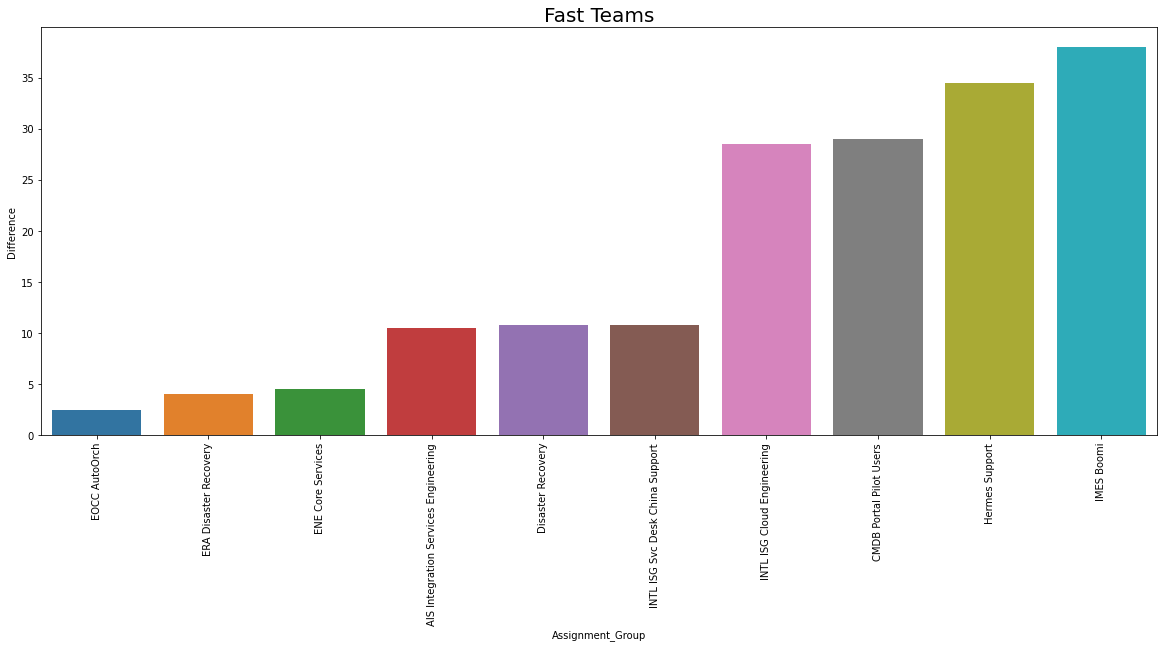

In [47]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p4 = sns.barplot(x= "Assignment_Group", y='Difference' , data=avgtime.iloc[0:10] ) #count plot using sea born module
p4.set_xticklabels(p4.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p4.set_title("Fast Teams", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot 1

#### Creating a data frame "top_groups_count" based on total count of Incidents for each Assignment Group

In [48]:
top_groups_count = pd.DataFrame(df.groupby("ASSIGNMENT_GROUP")["NUMBER"].count()) # calculating sum of amount for each sector
top_groups_count.sort_values("NUMBER", ascending = False, inplace=True) # 
top_groups_count.head(15) # 

,NUMBER
ASSIGNMENT_GROUP,
SystemsMgmtProducts,53072
WindowsServerSupport,27531
PROD SVC DB Alerting - Oracle,24988
EOCC Event Management,17145
Linux,16406
X86 Platform Support,14872
Global Platform L2 Support,13273
EOCC AutoOrch,9190
Global Linux L2 Support,9101


***Fetching list of top Assignment groups by count to perform text analytics***

In [49]:
top_groups_list = list(top_groups_count.index)[0:10]
top_groups_list

['SystemsMgmtProducts',
 'WindowsServerSupport',
 'PROD SVC DB Alerting - Oracle',
 'EOCC Event Management',
 'Linux',
 'X86 Platform Support',
 'Global Platform L2 Support',
 'EOCC AutoOrch',
 'Global Linux L2 Support',
 'INTL ISG Svc Desk Analysts']

#### Plot 5: This graph shows top 15 groups based on count for each Assignment Group

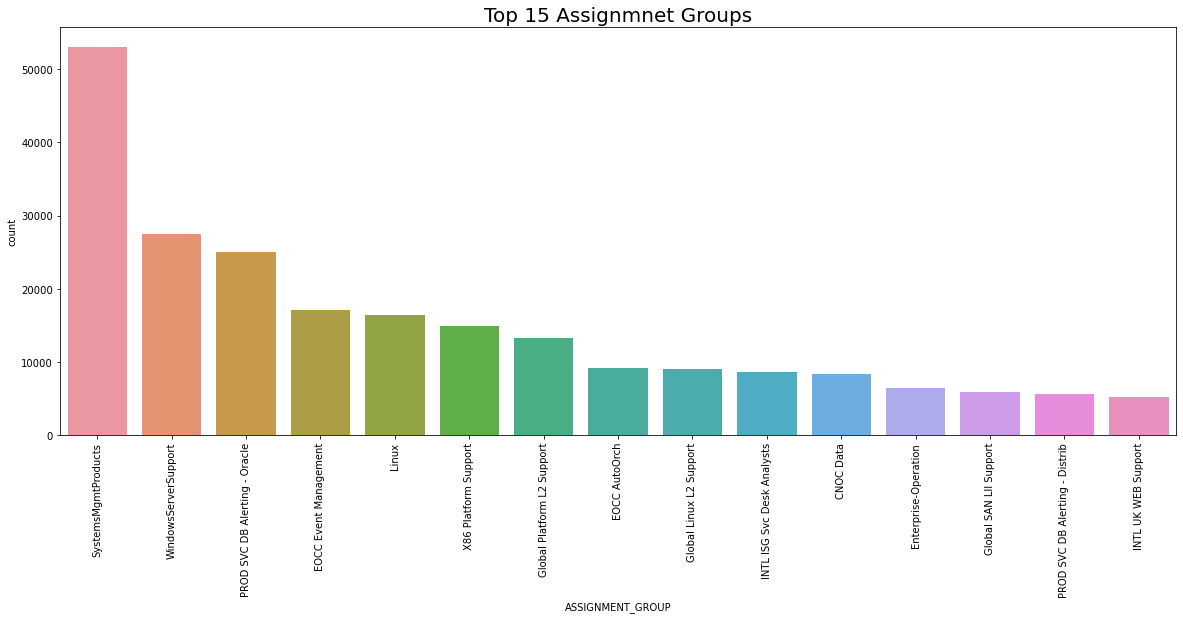

In [50]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p5 = sns.countplot(data=df,x='ASSIGNMENT_GROUP', order=df.ASSIGNMENT_GROUP.value_counts().iloc[:15].index) #count plot using sea born module
p5.set_xticklabels(p5.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p5.set_title("Top 15 Assignmnet Groups", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 6: This graph shows top 15 groups based on count for each Business Service

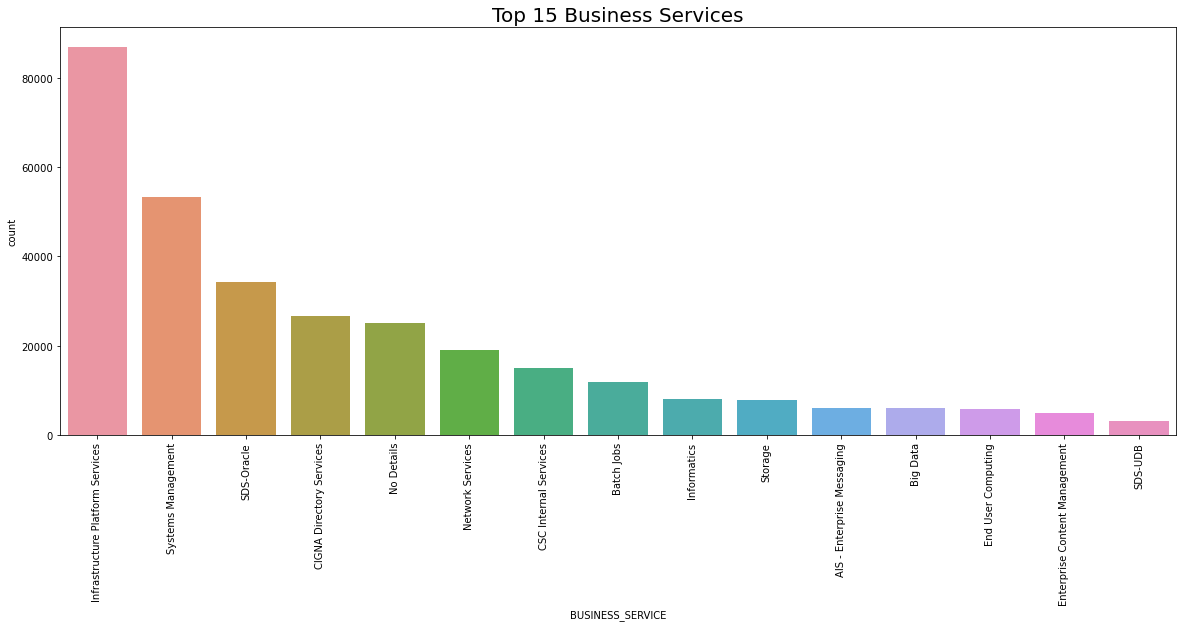

In [51]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p6 = sns.countplot(data=df,x='BUSINESS_SERVICE', order=df.BUSINESS_SERVICE.value_counts().iloc[:15].index) #count plot using sea born module
p6.set_xticklabels(p6.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p6.set_title("Top 15 Business Services", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 7: This graph shows top 15 groups based on count for each Location

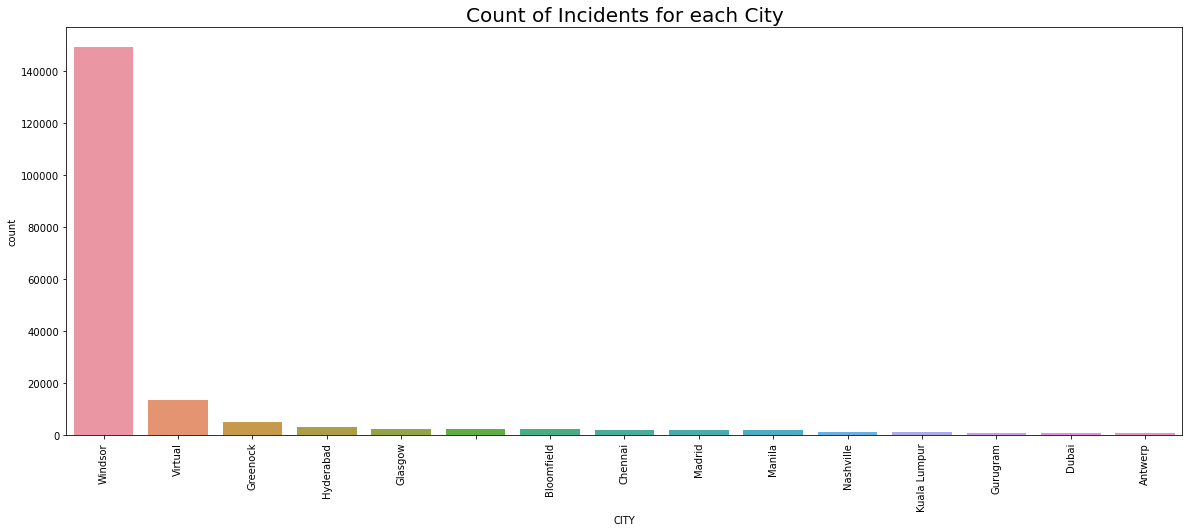

In [52]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p7 = sns.countplot(data=df,x='CITY', order=df.CITY.value_counts().iloc[:15].index) #count plot using sea born module
p7.set_xticklabels(p7.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p7.set_title("Count of Incidents for each City", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 8: This graph shows top 15 groups based on count for each State

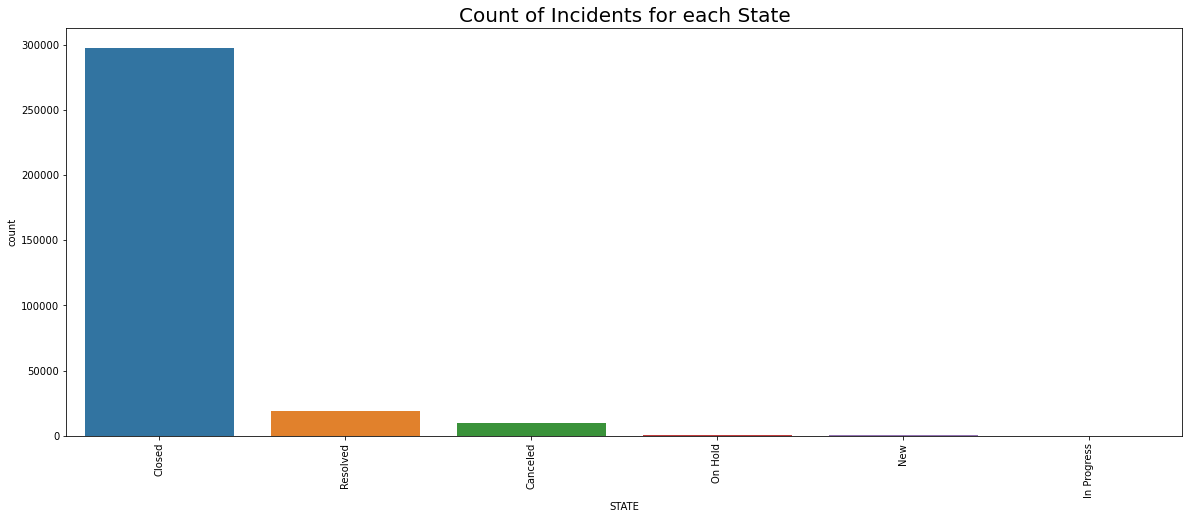

In [53]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p8 = sns.countplot(data=df,x='STATE', order=df.STATE.value_counts().iloc[:15].index) #count plot using sea born module
p8.set_xticklabels(p8.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p8.set_title("Count of Incidents for each State", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 9: This graph shows top 15 groups based on count for Contact Type

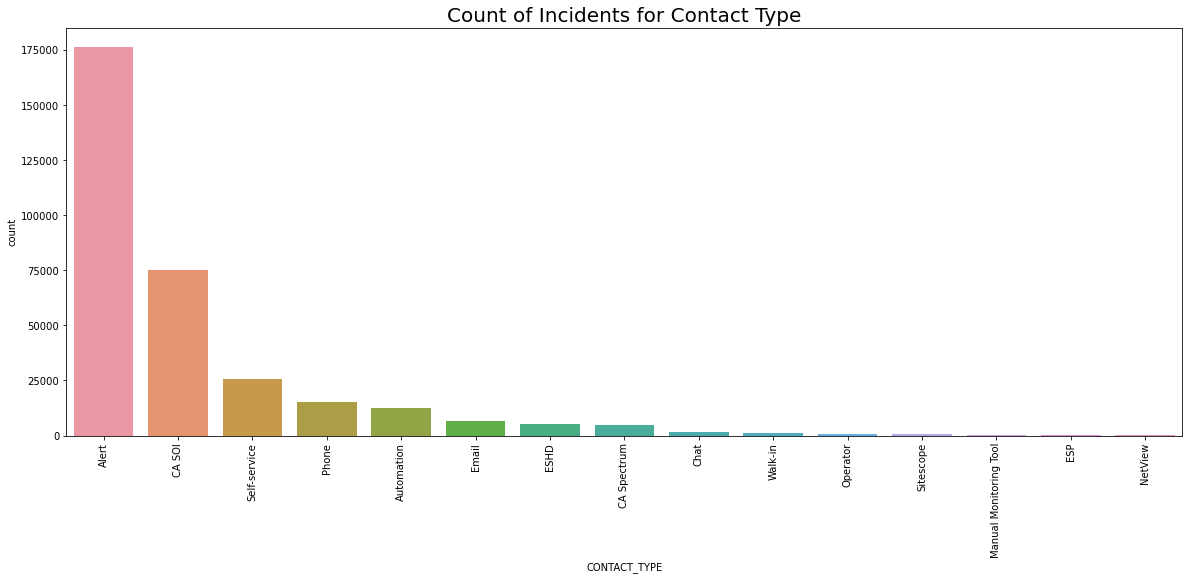

In [54]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p9 = sns.countplot(data=df,x='CONTACT_TYPE', order=df.CONTACT_TYPE.value_counts().iloc[:15].index) #count plot using sea born module
p9.set_xticklabels(p9.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p9.set_title("Count of Incidents for Contact Type", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 10: This graph shows top 15 groups based on count for Contact Type

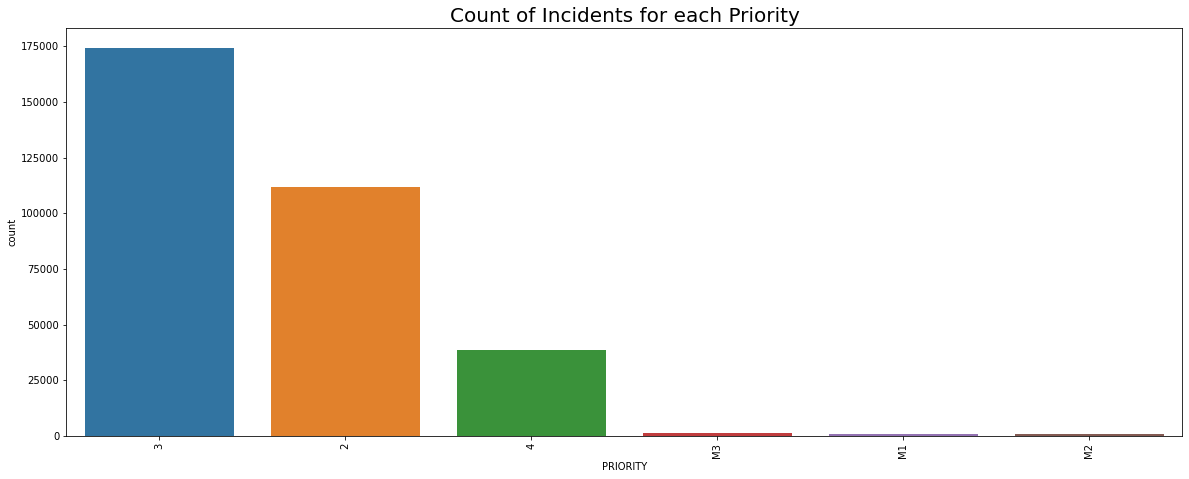

In [55]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p10 = sns.countplot(data=df,x='PRIORITY', order=df.PRIORITY.value_counts().iloc[:15].index) #count plot using sea born module
p10.set_xticklabels(p10.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p10.set_title("Count of Incidents for each Priority", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 11: This graph shows top 15 groups based on count for Contact Type

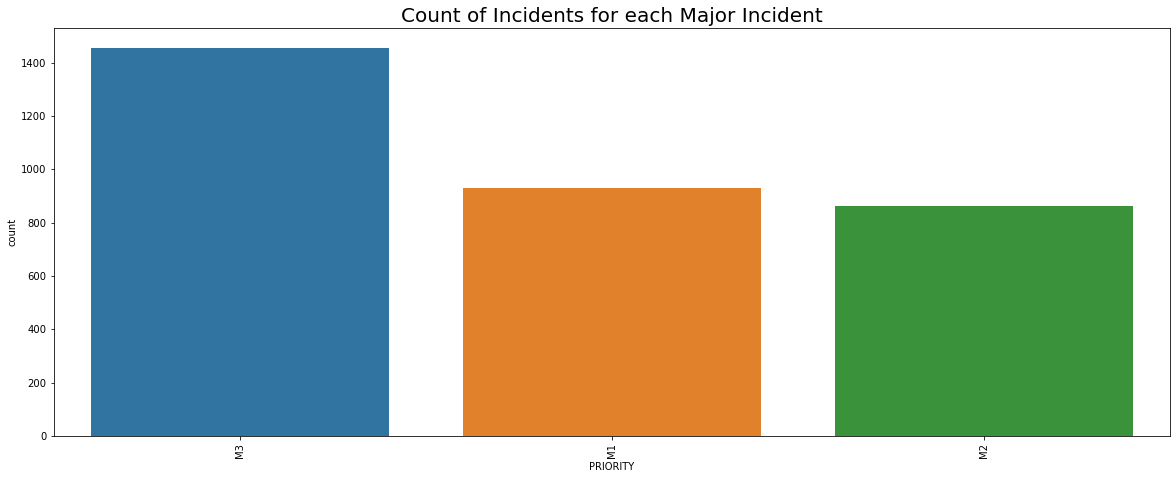

In [56]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p11 = sns.countplot(data=df,x='PRIORITY', order=df[df.isin(['M3', 'M2', 'M1'])].PRIORITY.value_counts().iloc[:15].index) #count plot using sea born module
p11.set_xticklabels(p11.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p11.set_title("Count of Incidents for each Major Incident", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 12: This graph shows top 15 groups based on count for each Incident Category

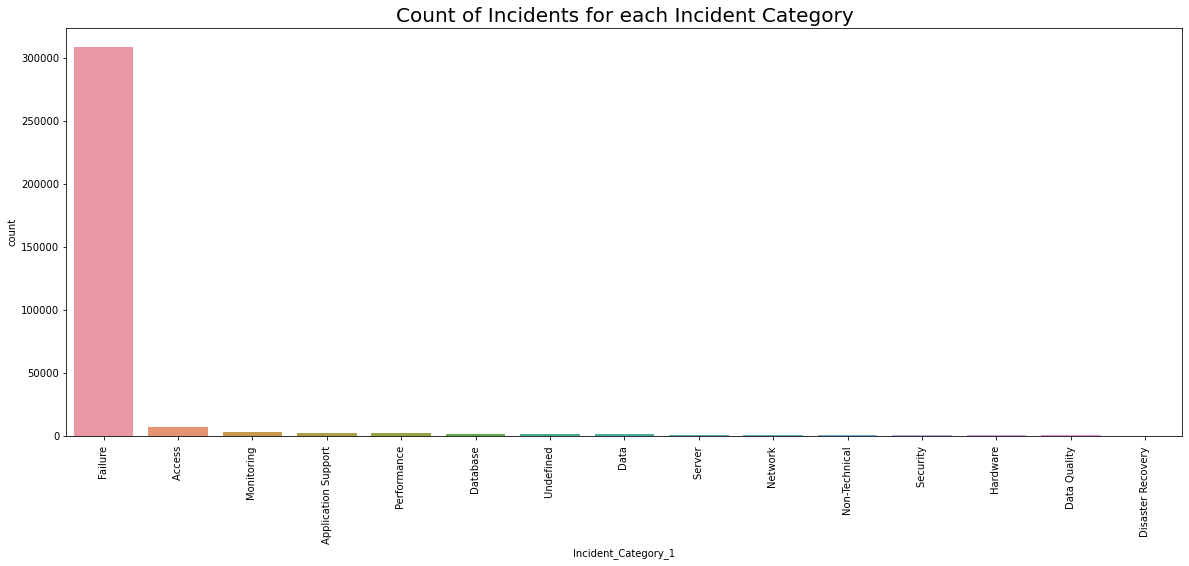

In [57]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p12 = sns.countplot(data=df,x='Incident_Category_1', order=df.Incident_Category_1.value_counts().iloc[:15].index) #count plot using sea born module
p12.set_xticklabels(p12.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p12.set_title("Count of Incidents for each Incident Category", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

#### Plot 13: This graph shows top 15 groups based on count for each Incident Sub-Category

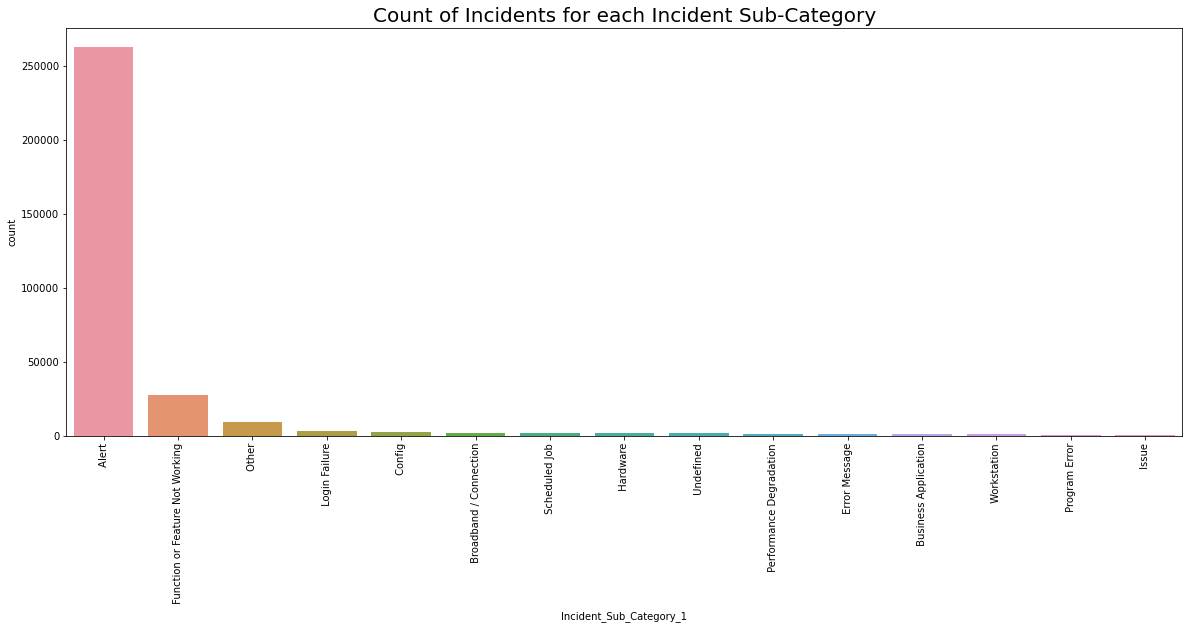

In [58]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p13 = sns.countplot(data=df,x='Incident_Sub_Category_1', order=df.Incident_Sub_Category_1.value_counts().iloc[:15].index) #count plot using sea born module
p13.set_xticklabels(p13.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p13.set_title("Count of Incidents for each Incident Sub-Category", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

# Objective 2 Data Analysis

***Fetching Managed Incident Data into a new dataframe df_2. Changing Null values to "No Details"***

In [59]:
df_2 = df[df['PRIORITY'].isin(['M3', 'M2', 'M1'])]
df_2 = df_2[~df_2['MAJOR_INCIDENT_STATE'].isin(['Rejected', 'Canceled']) ]
df_2["MAJOR_INCIDENT_STATE"].fillna("No Details", inplace = True) 

***Checking Unique Values in Managed Incident State***

In [60]:
df_2['MAJOR_INCIDENT_STATE'].unique() #to Fetch unique values

array(['No Details', 'Accepted'], dtype=object)

In [61]:
df_2.isnull().sum() #Checking Null values

NUMBER                        0
OPENED_AT                     0
RESOLVED_AT                  12
SYS_UPDATED_ON                0
STATE                         0
MAJOR_INCIDENT_STATE          0
ACTIVE                        0
PRIORITY                      0
IMPACT                        0
LOCATION                    191
PROPOSED_ON                3002
CONTACT_TYPE               1791
U_INC_CAT                     0
SHORT_DESCRIPTION             0
DESCRIPTION                   0
ASSIGNMENT_GROUP              1
PARENT_INCIDENT            1177
CHILD_INCIDENTS               1
REOPEN_COUNT                  1
REASSIGNMENT_COUNT            1
BUSINESS_SERVICE              0
Difference                   12
Incident_Category_1           0
Incident_Sub_Category_1       0
CITY                        191
dtype: int64

In [62]:
df_2.describe() #Statistical description of all numeric columns

,IMPACT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,Difference
count,3102.000000,3101.000000,3101.000000,3101.000000,3090.000000
mean,2.420052,2.813609,0.073525,1.007094,3233.769579
std,0.499491,39.916155,0.347914,1.111210,13935.292622
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,148.000000
50%,2.000000,0.000000,0.000000,1.000000,1105.500000
75%,3.000000,0.000000,0.000000,1.000000,1653.750000
max,3.000000,1144.000000,4.000000,10.000000,325897.000000


***Upper Bound calculation using user-defined function***

In [63]:
upperbound = outlier_treatment(df_2[~df_2['Difference'].isna()]['Difference']) 
upperbound 

6171.0

***Number of outlier records in Management Incident specific data frame***

In [64]:
len(df_2[df_2["Difference"] > upperbound]) 

236

***Dataframe formed from df_2 excluding outliers. This is calculate average resolution time for each Major_Incident_State***

In [65]:
df_mi = pd.DataFrame(df_2[df_2["Difference"] < upperbound].groupby("MAJOR_INCIDENT_STATE")["Difference"].mean()) # calculating sum of amount for each sector
df_mi.sort_values("Difference", ascending = False, inplace=True) # 
df_mi["MAJOR_INCIDENT_STATE"] = df_mi.index
df_mi.head(10) #


,Difference,MAJOR_INCIDENT_STATE
MAJOR_INCIDENT_STATE,,
No Details,1252.770736,No Details
Accepted,1162.942953,Accepted


#### Plot 15: This graph shows the average resolution for each Major Incident State. 

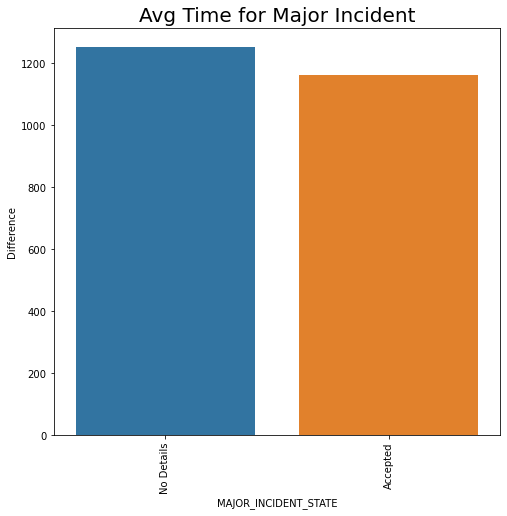

In [66]:
plt.figure(figsize=(8,7.5)) #Configuring plot size
p15 = sns.barplot(x= "MAJOR_INCIDENT_STATE", y='Difference' , data= df_mi ) #count plot using sea born module
p15.set_xticklabels(p15.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p15.set_title("Avg Time for Major Incident", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot 1

#### Plot 16: This graph shows the box-plot of difference column for each Major Incident State

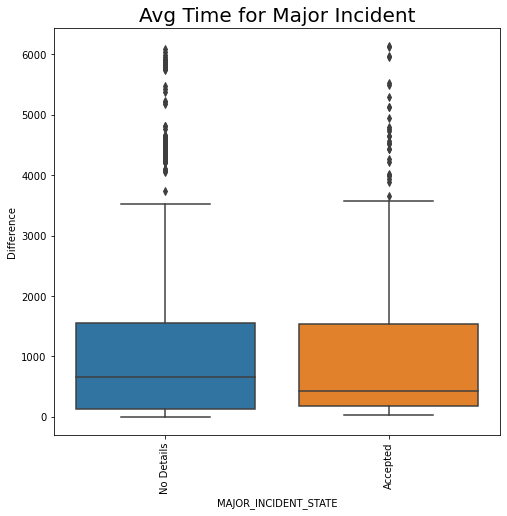

In [67]:
plt.figure(figsize=(8,7.5)) #Configuring plot size
p16 = sns.boxplot(x= "MAJOR_INCIDENT_STATE", y='Difference' , data= df_2[df_2["Difference"] < upperbound] ) #count plot using sea born module
p16.set_xticklabels(p16.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p16.set_title("Avg Time for Major Incident", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot 1

#### Forming Cocatenated Description for Text Mining

In [68]:
df['concatenated_description']= df['SHORT_DESCRIPTION'] + df['DESCRIPTION']

# Deleting Null Values in Significant Columns

In [69]:
df.isnull().sum()

NUMBER                           0
OPENED_AT                        0
RESOLVED_AT                  11101
SYS_UPDATED_ON                   0
STATE                            0
MAJOR_INCIDENT_STATE        327601
ACTIVE                           0
PRIORITY                        43
IMPACT                          44
LOCATION                    121538
PROPOSED_ON                 327922
CONTACT_TYPE                  2127
U_INC_CAT                       15
SHORT_DESCRIPTION                2
DESCRIPTION                     11
ASSIGNMENT_GROUP                 4
PARENT_INCIDENT             274240
CHILD_INCIDENTS                  4
REOPEN_COUNT                     4
REASSIGNMENT_COUNT               4
BUSINESS_SERVICE                 0
Difference                   11101
Incident_Category_1             15
Incident_Sub_Category_1         15
CITY                        121538
concatenated_description        13
dtype: int64

In [70]:
#Drop Columns which has null values in Assignment_group and concatenated_description
df = df.dropna(subset=['ASSIGNMENT_GROUP', 'concatenated_description', 'PRIORITY', 'IMPACT', 'CONTACT_TYPE' , 'Incident_Category_1', 'Incident_Sub_Category_1'])
print(df.shape) # now we have 48K rows
df.head()

(326053, 26)


,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,IMPACT,LOCATION,...,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE,Difference,Incident_Category_1,Incident_Sub_Category_1,CITY,concatenated_description
0,INC1319662,2021-05-31 10:12:19,2021-05-31 10:19:07,2021-06-14 11:00:10,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,NaN,0.0,0.0,0.0,Systems Management,6.0,Failure,Alert,Windsor,MANAGEMENT AGENT LOSTDevice ciloracd2022 of ty...
1,INC1155199,2021-04-29 01:10:02,2021-04-29 01:13:07,2021-05-13 02:00:08,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,NaN,0.0,0.0,0.0,Systems Management,3.0,Failure,Alert,Windsor,MANAGEMENT AGENT LOSTDevice cvwiisxp00180. of ...
2,INC0799260,2021-02-01 09:43:45,2021-02-01 09:52:07,2021-02-15 10:00:13,Closed,NaN,False,3,3.0,NaN,...,NaN,0.0,0.0,0.0,Systems Management,8.0,Failure,Alert,NaN,MANAGEMENT AGENT LOSTDevice <DOMAIN_NAME> of t...
3,INC0650904,2020-12-13 14:21:09,2020-12-14 12:34:26,2020-12-28 13:00:12,Closed,NaN,False,3,3.0,NaN,...,INC0651688,0.0,0.0,0.0,Systems Management,1333.0,Failure,Alert,NaN,MANAGEMENT AGENT LOSTA Major alarm was generat...
4,INC1599254,2021-07-11 00:21:43,2021-07-11 02:56:16,2021-07-25 03:00:21,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,NaN,0.0,0.0,2.0,CIGNA Directory Services,154.0,Failure,Alert,Windsor,Synthetic failure -Specialty Script Gateway UR...


# Encoding Categorical Variables and Derive Correlation

In [71]:
#Forming a new data frame for correlationa analysis
df_data = df.copy()

**The concatenated description and Assignment group columns have few Null values. Dropping those rows**

In [72]:
df_data['concatenated_description']= df_data['SHORT_DESCRIPTION'] + df_data['DESCRIPTION']

In [73]:
df_data.head()

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,IMPACT,LOCATION,...,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE,Difference,Incident_Category_1,Incident_Sub_Category_1,CITY,concatenated_description
0,INC1319662,2021-05-31 10:12:19,2021-05-31 10:19:07,2021-06-14 11:00:10,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,NaN,0.0,0.0,0.0,Systems Management,6.0,Failure,Alert,Windsor,MANAGEMENT AGENT LOSTDevice ciloracd2022 of ty...
1,INC1155199,2021-04-29 01:10:02,2021-04-29 01:13:07,2021-05-13 02:00:08,Closed,NaN,False,3,3.0,USACTBO000:Windsor,...,NaN,0.0,0.0,0.0,Systems Management,3.0,Failure,Alert,Windsor,MANAGEMENT AGENT LOSTDevice cvwiisxp00180. of ...
2,INC0799260,2021-02-01 09:43:45,2021-02-01 09:52:07,2021-02-15 10:00:13,Closed,NaN,False,3,3.0,NaN,...,NaN,0.0,0.0,0.0,Systems Management,8.0,Failure,Alert,NaN,MANAGEMENT AGENT LOSTDevice <DOMAIN_NAME> of t...
3,INC0650904,2020-12-13 14:21:09,2020-12-14 12:34:26,2020-12-28 13:00:12,Closed,NaN,False,3,3.0,NaN,...,INC0651688,0.0,0.0,0.0,Systems Management,1333.0,Failure,Alert,NaN,MANAGEMENT AGENT LOSTA Major alarm was generat...
4,INC1599254,2021-07-11 00:21:43,2021-07-11 02:56:16,2021-07-25 03:00:21,Closed,NaN,False,2,2.0,USACTBO000:Windsor,...,NaN,0.0,0.0,2.0,CIGNA Directory Services,154.0,Failure,Alert,Windsor,Synthetic failure -Specialty Script Gateway UR...


***Encoding State Column***

In [74]:
State_lst = df_data["STATE"].unique()
State_lst.sort()
State_dict = dict(zip(State_lst, range(len(State_lst))))
df_data["STATE"].replace(State_dict, inplace=True)
print(State_dict)

{'Canceled': 0, 'Closed': 1, 'In Progress': 2, 'New': 3, 'On Hold': 4, 'Resolved': 5}


***Encoding Assignment_Group Column***

In [75]:
Assignment_lst = df_data["ASSIGNMENT_GROUP"].unique()
#Assignment_lst.sort()
Assignment_dict = dict(zip(Assignment_lst, range(len(Assignment_lst))))
df_data["ASSIGNMENT_GROUP"].replace(Assignment_dict, inplace=True)
print(Assignment_dict)

{'SystemsMgmtProducts': 0, 'EOCC Event Management': 1, 'Global SAN LII Support': 2, 'DBA - Oracle': 3, 'EOCC - Mainframe Event Management': 4, 'PROD SVC DB Alerting - Oracle': 5, 'Global Linux L2 Support': 6, 'NAS LII Support': 7, 'EOCC AutoOrch': 8, 'Big Data': 9, 'CNOC Data': 10, 'EOCC - Forensic Troubleshooting': 11, 'INTL UK WEB Support': 12, 'Global DB Oracle L2 Support': 13, 'Linux': 14, 'InformationMgmtProd': 15, 'Middleware Ops - BV-WAS-Pega-Tomcat': 16, 'Cloud CoE AWS Engineering': 17, 'WindowsServerSupport': 18, 'C SYS ETL': 19, 'X86 Platform Support': 20, 'INTL Antwerp IT Requests': 21, 'Network Operations': 22, 'ServiceNow Administration': 23, 'ETSSecOps': 24, 'ENE Proxy Services': 25, 'INTL ISG Server and Storage': 26, 'CM Net Serv Data Engineering': 27, 'INTL ISG Svc Desk China Support': 28, 'HealthSpring SAN and Linux': 29, 'Online View Services': 30, 'Global Platform L2 Support': 31, 'DBA - DB2 LUW': 32, 'GSS HGS Jamaica': 33, 'Data Network Support - Firewall': 34, 'Ent

***Encoding Business_service Column***

In [76]:
Business_lst = df_data["BUSINESS_SERVICE"].unique()
#Business_lst.sort()
Business_dict = dict(zip(Business_lst, range(len(Business_lst))))
df_data["BUSINESS_SERVICE"].replace(Business_dict, inplace=True)
print(Business_dict)

{'Systems Management': 0, 'CIGNA Directory Services': 1, 'Storage': 2, 'No Details': 3, 'Batch Jobs': 4, 'SDS-Oracle': 5, 'Infrastructure Platform Services': 6, 'AIS - Enterprise Messaging': 7, 'Big Data': 8, 'Network Services': 9, 'Informatics': 10, 'Enterprise Content Management': 11, 'Unknown Service': 12, 'CSC Internal Services': 13, 'End User Computing': 14, 'Meeting Services': 15, 'SDS-DB2': 16, 'Mobility': 17, 'SDS-UDB': 18, 'SDS-IMS': 19, 'IT Applications': 20, 'AIS - Business Process Manager': 21, 'SDS-SQL Server': 22, 'SDS-PostgreSQL': 23, 'Collaboration Tools': 24, 'Mainframe Application Hosting': 25, 'AIS - Partner Integration': 26, 'AIS - Application Server': 27, 'SDS-Sybase': 28, 'App Dev Tools': 29, 'End User Infrastructure Services': 30, 'AIS - Integration Server': 31, 'AIS - Web Server': 32, 'Voice and Telephony': 33, 'AIS - File Transfer': 34, 'Disaster Recovery': 35, 'Application Integration': 36, 'Software Code Mgmt': 37, 'Software Distribution': 38, 'End User Provi

***Encoding Contact_Type Column***

In [77]:
Contact_lst = df_data["CONTACT_TYPE"].unique()
#Contact_lst.sort()
Contact_dict = dict(zip(Contact_lst, range(len(Contact_lst))))
df_data["CONTACT_TYPE"].replace(Contact_dict, inplace=True)
print(Contact_dict)

{'Alert': 0, 'CA SOI': 1, 'Self-service': 2, 'ESHD': 3, 'Phone': 4, 'Email': 5, 'eBonding NYL': 6, 'Chat': 7, 'CA Spectrum': 8, 'Automation': 9, 'Manual Monitoring Tool': 10, 'Operator': 11, 'Walk-in': 12, 'Sitescope': 13, 'Oview/Omegamon': 14, 'NetView': 15, 'ESP': 16, 'Robot': 17, 'IMT': 18, 'nowMobile': 19}


***Encoding Incident_Category Column***

In [78]:
category_lst = df_data["Incident_Category_1"].unique()
#Contact_lst.sort()
Category_dict = dict(zip(category_lst, range(len(category_lst))))
df_data["Incident_Category_1"].replace(Category_dict, inplace=True)
print(Category_dict)

{'Failure ': 0, 'Network ': 1, 'Access ': 2, 'Monitoring ': 3, 'Data Quality ': 4, 'Application Support ': 5, 'Data ': 6, 'Performance ': 7, 'Undefined ': 8, 'Database ': 9, 'Hardware ': 10, 'Security ': 11, 'Server ': 12, 'Non-Technical ': 13, 'Program Activities for 1-1 Readiness ': 14, 'Disaster Recovery ': 15, 'External Customer ': 16, 'CA ': 17, 'Telephony ': 18, 'Application Support': 19}


***Encoding Incident_Sub_Category Column***

In [79]:
sub_category_lst = df_data["Incident_Sub_Category_1"].unique()
#Contact_lst.sort()
Sub_Category_dict = dict(zip(sub_category_lst, range(len(sub_category_lst))))
df_data["Incident_Sub_Category_1"].replace(Sub_Category_dict, inplace=True)
print(Sub_Category_dict)

{' Alert': 0, ' Function or Feature Not Working': 1, ' Connectivity': 2, ' Scheduled Job': 3, ' Error Message': 4, ' CA': 5, ' Login Failure': 6, ' JCL': 7, ' Config': 8, ' Other': 9, ' Data': 10, ' BPS': 11, ' Distributed (LAN)': 12, ' Business Application': 13, ' Broadband / Connection': 14, ' Data or File Missing': 15, ' Performance Degradation': 16, ' Undefined': 17, ' Hardware': 18, ' Distributed': 19, ' Batch': 20, ' Authorization Error': 21, ' Remote Services': 22, ' Citrix/Windows Terminal': 23, ' Replace': 24, ' Cutter': 25, ' Jobs': 26, ' Remediation': 27, ' ETL': 28, ' SQL': 29, ' Server': 30, ' Data or File Incorrect': 31, ' Network': 32, ' Database Product': 33, ' Workstation': 34, ' Application Integration Services': 35, ' HS': 36, ' Restore': 37, ' Software': 38, ' Application Abend / Not Available': 39, ' Midrange': 40, ' Downstream Reporting': 41, ' System or Application Hangs': 42, ' Web': 43, ' Service-Preventive Maintenance': 44, ' Program Error': 45, ' UNIX': 46, '

***Encoding CITY column***

In [80]:
City_lst = df_data["CITY"].unique()
#Contact_lst.sort()
City_dict = dict(zip(City_lst, range(len(City_lst))))
df_data["CITY"].replace(City_dict, inplace=True)
print(City_dict)

{'Windsor': 0, nan: 1, 'Greenock': 2, 'Virtual': 3, 'Manila': 4, 'Franklin Lakes': 5, 'Phoenix': 6, 'Seattle': 7, '': 8, 'Jacksonville': 9, 'Kingston': 10, 'Pittsburgh': 11, 'Chennai': 12, 'Nairobi': 13, 'Kuala Lumpur': 14, 'Scranton': 15, 'Kwun Tong': 16, 'Hyderabad': 17, 'Piscataway': 18, 'Bloomfield': 19, 'Antwerp': 20, 'Glasgow': 21, 'Gurugram': 22, 'Nashville': 23, 'West Drayton': 24, 'Madrid': 25, 'St. Louis': 26, 'Easton': 27, 'Philadelphia': 28, 'Bloomington': 29, 'Baltimore': 30, 'Denver': 31, 'Dubai': 32, 'Visalia': 33, 'Birmingham': 34, 'Sterling': 35, 'Irvine': 36, 'Chicago': 37, 'Tempe': 38, 'Antwerpen': 39, 'Shanghai': 40, 'Bangkok': 41, 'Wilmington': 42, 'Bengaluru': 43, 'Raleigh': 44, 'Quezon City': 45, 'Newton': 46, 'Auckland': 47, 'Jakarta': 48, 'Peoria': 49, 'Healthspring': 50, 'Chattanooga': 51, 'Franklin': 52, 'New York': 53, 'Hartford': 54, 'Ngau Tau Kok': 55, 'Bangalore': 56, 'Louisville': 57, 'St Louis': 58, 'Zhongzheng District 100': 59, 'Westerville': 60, 'Pla

In [81]:
df_data.head()

,NUMBER,OPENED_AT,RESOLVED_AT,SYS_UPDATED_ON,STATE,MAJOR_INCIDENT_STATE,ACTIVE,PRIORITY,IMPACT,LOCATION,...,PARENT_INCIDENT,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE,Difference,Incident_Category_1,Incident_Sub_Category_1,CITY,concatenated_description
0,INC1319662,2021-05-31 10:12:19,2021-05-31 10:19:07,2021-06-14 11:00:10,1,NaN,False,3,3.0,USACTBO000:Windsor,...,NaN,0.0,0.0,0.0,0,6.0,0,0,0,MANAGEMENT AGENT LOSTDevice ciloracd2022 of ty...
1,INC1155199,2021-04-29 01:10:02,2021-04-29 01:13:07,2021-05-13 02:00:08,1,NaN,False,3,3.0,USACTBO000:Windsor,...,NaN,0.0,0.0,0.0,0,3.0,0,0,0,MANAGEMENT AGENT LOSTDevice cvwiisxp00180. of ...
2,INC0799260,2021-02-01 09:43:45,2021-02-01 09:52:07,2021-02-15 10:00:13,1,NaN,False,3,3.0,NaN,...,NaN,0.0,0.0,0.0,0,8.0,0,0,1,MANAGEMENT AGENT LOSTDevice <DOMAIN_NAME> of t...
3,INC0650904,2020-12-13 14:21:09,2020-12-14 12:34:26,2020-12-28 13:00:12,1,NaN,False,3,3.0,NaN,...,INC0651688,0.0,0.0,0.0,0,1333.0,0,0,1,MANAGEMENT AGENT LOSTA Major alarm was generat...
4,INC1599254,2021-07-11 00:21:43,2021-07-11 02:56:16,2021-07-25 03:00:21,1,NaN,False,2,2.0,USACTBO000:Windsor,...,NaN,0.0,0.0,2.0,1,154.0,0,0,0,Synthetic failure -Specialty Script Gateway UR...


***Forming Correlation Matrix***

In [82]:
corr = df_data.corr()
corr

,STATE,ACTIVE,IMPACT,CONTACT_TYPE,ASSIGNMENT_GROUP,CHILD_INCIDENTS,REOPEN_COUNT,REASSIGNMENT_COUNT,BUSINESS_SERVICE,Difference,Incident_Category_1,Incident_Sub_Category_1,CITY
STATE,1.000000,0.977679,-0.088058,-0.092649,-0.012639,-0.003986,0.019775,0.014678,-0.034610,-0.005761,-0.018171,-0.018768,-0.038212
ACTIVE,0.977679,1.000000,-0.073581,-0.070050,0.011491,-0.004150,0.022885,0.030596,-0.013715,-0.005623,0.010616,-0.005336,-0.023458
IMPACT,-0.088058,-0.073581,1.000000,0.442023,0.260941,-0.014620,0.008656,0.186270,0.152820,0.127786,0.275849,0.292953,0.293471
CONTACT_TYPE,-0.092649,-0.070050,0.442023,1.000000,0.341131,0.005949,-0.025264,0.120468,0.355243,0.124174,0.293682,0.366334,0.321417
ASSIGNMENT_GROUP,-0.012639,0.011491,0.260941,0.341131,1.000000,0.000891,0.037996,0.235451,0.446023,0.136781,0.217300,0.245244,0.204428
CHILD_INCIDENTS,-0.003986,-0.004150,-0.014620,0.005949,0.000891,1.000000,0.001544,0.015309,-0.002687,0.002957,-0.002848,0.000205,0.000938
REOPEN_COUNT,0.019775,0.022885,0.008656,-0.025264,0.037996,0.001544,1.000000,0.103235,0.010175,0.039886,-0.005090,-0.003325,-0.001122
REASSIGNMENT_COUNT,0.014678,0.030596,0.186270,0.120468,0.235451,0.015309,0.103235,1.000000,0.168635,0.197826,0.057181,0.093199,0.179413
BUSINESS_SERVICE,-0.034610,-0.013715,0.152820,0.355243,0.446023,-0.002687,0.010175,0.168635,1.000000,0.126576,0.156258,0.153586,0.207259
Difference,-0.005761,-0.005623,0.127786,0.124174,0.136781,0.002957,0.039886,0.197826,0.126576,1.000000,0.086226,0.084333,0.101785


***Heat map: Correlation Plot***

Text(0.5, 1.0, 'Correlation Heatmap')

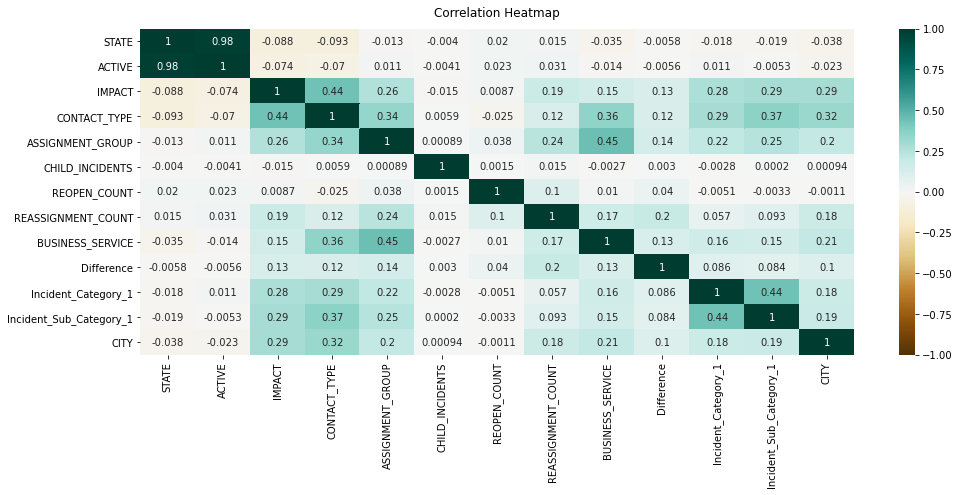

In [83]:
plt.figure(figsize=(16, 6))   # to increase teh size of heatmao
heatmap = sns.heatmap(df_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

***Correlation Heatmap for ASSIGNMENT_GROUP against all other columns***

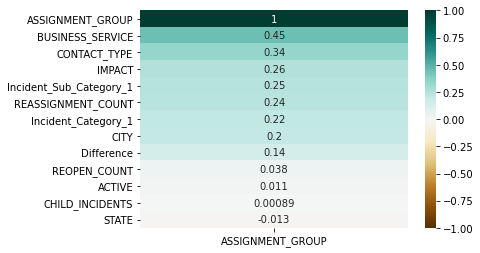

In [84]:
# Another heatmap showing correlation of 'Assignment_Group' with other variables
heatmap_2 = sns.heatmap(df_data.corr()[['ASSIGNMENT_GROUP']].sort_values(by='ASSIGNMENT_GROUP', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

***Selecting Columns with High Correlation along with unique identifier and Checking NULL values before initiating the Modeling tasks***

In [85]:
main_datacolumns = ['NUMBER','ASSIGNMENT_GROUP', 'concatenated_description', 'PRIORITY','IMPACT', 'CONTACT_TYPE', 'BUSINESS_SERVICE', 'REASSIGNMENT_COUNT', 'Incident_Category_1', 'Incident_Sub_Category_1']
df[main_datacolumns].isna().sum()

NUMBER                      0
ASSIGNMENT_GROUP            0
concatenated_description    0
PRIORITY                    0
IMPACT                      0
CONTACT_TYPE                0
BUSINESS_SERVICE            0
REASSIGNMENT_COUNT          0
Incident_Category_1         0
Incident_Sub_Category_1     0
dtype: int64

**Selecting relevant columns applicable for Onjective 1 and store the data into dataframe df_text**

In [86]:
objective_1_columns  = ['NUMBER','ASSIGNMENT_GROUP', 'PRIORITY', 'concatenated_description', 'IMPACT', 'CONTACT_TYPE', 'BUSINESS_SERVICE', 'REASSIGNMENT_COUNT', 'Incident_Category_1', 'Incident_Sub_Category_1', 'CITY', 'Difference']
df_text = df[objective_1_columns] #Y, X
df_text

,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference
0,INC1319662,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice ciloracd2022 of ty...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0
1,INC1155199,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice cvwiisxp00180. of ...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0
2,INC0799260,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice <DOMAIN_NAME> of t...,3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0
3,INC0650904,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTA Major alarm was generat...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0
4,INC1599254,EOCC Event Management,2,Synthetic failure -Specialty Script Gateway UR...,2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328235,INC1269292,EOCC Event Management,4,Used disk space on / percentage = 90% on Host...,3.0,Alert,CIGNA Directory Services,1.0,Failure,Alert,Windsor,60.0
328236,INC0173447,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTA Major alarm was generat...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,337.0
328237,INC1286891,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice QNJ1VBRP01.qualcar...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,111.0
328238,INC1149620,Online View Services,3,Filenet id deletion greater that 365 daysPleas...,4.0,Email,Informatics,0.0,Data,Maintenance,Windsor,1161.0


**Reset_index function reset the index from 0 to n-1**

In [87]:
df_text.reset_index(inplace=True, drop=True)
df_text

,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference
0,INC1319662,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice ciloracd2022 of ty...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0
1,INC1155199,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice cvwiisxp00180. of ...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0
2,INC0799260,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice <DOMAIN_NAME> of t...,3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0
3,INC0650904,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTA Major alarm was generat...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0
4,INC1599254,EOCC Event Management,2,Synthetic failure -Specialty Script Gateway UR...,2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
326048,INC1269292,EOCC Event Management,4,Used disk space on / percentage = 90% on Host...,3.0,Alert,CIGNA Directory Services,1.0,Failure,Alert,Windsor,60.0
326049,INC0173447,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTA Major alarm was generat...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,337.0
326050,INC1286891,SystemsMgmtProducts,3,MANAGEMENT AGENT LOSTDevice QNJ1VBRP01.qualcar...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,111.0
326051,INC1149620,Online View Services,3,Filenet id deletion greater that 365 daysPleas...,4.0,Email,Informatics,0.0,Data,Maintenance,Windsor,1161.0


**Inorder maintain the consistency, we converted entire concatenated description to lower case**

In [88]:
# make everything lowercase
pd.options.mode.chained_assignment = None  # default='warn'
df_text['concatenated_description'] = df_text['concatenated_description'].str.lower()
df_text.head()

,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference
0,INC1319662,SystemsMgmtProducts,3,management agent lostdevice ciloracd2022 of ty...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0
1,INC1155199,SystemsMgmtProducts,3,management agent lostdevice cvwiisxp00180. of ...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0
2,INC0799260,SystemsMgmtProducts,3,management agent lostdevice <domain_name> of t...,3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0
3,INC0650904,SystemsMgmtProducts,3,management agent losta major alarm was generat...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0
4,INC1599254,EOCC Event Management,2,synthetic failure -specialty script gateway ur...,2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0


**All characted other that alphabets (A-z) have been removed**

In [89]:
df_text['concatenated_description'] = df_text['concatenated_description'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_text.head()

,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference
0,INC1319662,SystemsMgmtProducts,3,management agent lostdevice ciloracd of type h...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0
1,INC1155199,SystemsMgmtProducts,3,management agent lostdevice cvwiisxp of type h...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0
2,INC0799260,SystemsMgmtProducts,3,management agent lostdevice domain_name of typ...,3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0
3,INC0650904,SystemsMgmtProducts,3,management agent losta major alarm was generat...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0
4,INC1599254,EOCC Event Management,2,synthetic failure specialty script gateway url...,2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0


***This is to print first three values and cross-check***

In [90]:
print(df['concatenated_description'][0])
print(df['concatenated_description'][1])
print(df['concatenated_description'][2])

MANAGEMENT AGENT LOSTDevice ciloracd2022 of type Host_systemEDGE is no longer responding to primary management requests (e.g. SNMP), but appears to be responsive to other communication protocol (e.g. ICMP).This condition has persisted for an extended amount of time.An alarm will be generated.
MANAGEMENT AGENT LOSTDevice cvwiisxp00180. of type Host_systemEDGE is no longer responding to primary management requests (e.g. SNMP), but appears to be responsive to other communication protocol (e.g. ICMP).This condition has persisted for an extended amount of time.An alarm will be generated.
MANAGEMENT AGENT LOSTDevice <DOMAIN_NAME> of type Host_systemEDGE is no longer responding to primary management requests (e.g. SNMP), but appears to be responsive to other communication protocol (e.g. ICMP).This condition has persisted for an extended amount of time.An alarm will be generated.


**We need to removed stop words like and, an, a, the which are not useful for the modeling. All the common words in nltk stopwords library are stored in variable stop. This is achived using Natural Language Tool Kit**

In [91]:
nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!

print('Here are the stop words we will delete!')
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

Here are the stop words we will delete!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not'

[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Teja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**The following lamba function will delete all the stop words from concated description column**

In [92]:
df_text["concatenated_description"] = df_text['concatenated_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df_text.head()


,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference
0,INC1319662,SystemsMgmtProducts,3,management agent lostdevice ciloracd type host...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0
1,INC1155199,SystemsMgmtProducts,3,management agent lostdevice cvwiisxp type host...,3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0
2,INC0799260,SystemsMgmtProducts,3,management agent lostdevice domain_name type h...,3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0
3,INC0650904,SystemsMgmtProducts,3,management agent losta major alarm generated s...,3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0
4,INC1599254,EOCC Event Management,2,synthetic failure specialty script gateway url...,2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0


# Text Analytics

**Analyzing the most common words occured in entire description column**

In [93]:
#the most common words in the concatenated description
myTable = df_text['concatenated_description'].str.split(expand=True).stack().value_counts()
print('Done')

Done


In [94]:
myTable

alarm                                                                                                          381231
event                                                                                                          234448
generated                                                                                                      229973
soi                                                                                                            180237
device                                                                                                         175028
                                                                                                                ...  
desktopcleared                                                                                                      1
chrdsprdifemprdifihprdffvrmprd                                                                                      1
attunity_errorrestart_linuxpspr_edbaprd                 

**Joining df_text and outlier_df to fetch concatenated description column for text Analytics.**

In [95]:
outlier_groups
outlier_df
df_outlier2 = outlier_df.merge(df_text, how = 'inner', on =  'NUMBER')[['ASSIGNMENT_GROUP_x','Difference_x', 'concatenated_description' ]]
df_outlier2

,ASSIGNMENT_GROUP_x,Difference_x,concatenated_description
0,DBA - Oracle,20130.0,domain_namecpu utilization crossed warning cri...
1,Global Linux L2 Support,11886.0,san multipath connection error equal configure...
2,NAS LII Support,10088.0,netapp shelf faultdevice wdcnapcn type netappo...
3,INTL UK WEB Support,12859.0,uk client portal issuesuk client portal issues
4,Linux,6619.0,user open file limit nofile system fsfilemax l...
...,...,...,...
42578,NetServ NetDevOps,32595.0,clive health check toolmissing categoriesclive...
42579,PROD SVC DB Alerting - Distrib,54192.0,esp abend ciwsqlxp c_tdba_ciwsqlxp_dbasql_dbtr...
42580,WindowsServerSupport,25788.0,backups ciwappxp timing backups ciwappxp timin...
42581,WindowsServerSupport,4420.0,process associated ci_wintel_auto_svcbiztalk s...


***The outlier_groups list contains top 10 list of Assignment groups by higher resolution Time. Counting top 10 words for each category***

In [96]:
for i in outlier_groups:
    outlier_group_words = df_outlier2[df_outlier2['ASSIGNMENT_GROUP_x'] == i]['concatenated_description'].str.split(expand=True).stack().value_counts()
    print(i)
    print(outlier_group_words[0:10])

SM Administration
central          2
support          2
band             2
issue            2
functionality    2
approvedtech     1
authority        1
asr              1
via              1
form             1
dtype: int64
AIS Kafka Engineering
kafka                  3
permissions            2
customer               2
validate               2
raised                 1
sandeep                1
permissionsoriginal    1
requesting             1
ticket                 1
gunda                  1
dtype: int64
ISG RM
server       2
nas          2
customer     1
calling      1
unmounted    1
remount      1
dtype: int64
Data Network Support Auto
alarm       4
cpu         3
soi         3
standard    3
current     2
portal      2
ens         2
new         2
ene         2
access      2
dtype: int64
ENE Capacity Planning Project Support
alarm                            10
generated                         6
primary                           5
httpsciaueebpvoicesyscignacom     4
soi                    

***The outlier_groups_count_list list contains top 10 list of Assignment groups by count. Counting top 10 words for each category***

In [97]:
outlier_groups_count_list

for i in outlier_groups_count_list:
    outlier_group_count_words = df_outlier2[df_outlier2['ASSIGNMENT_GROUP_x'] == i]['concatenated_description'].str.split(expand=True).stack().value_counts()
    print(i)
    print(outlier_group_count_words[0:10])

Global Platform L2 Support
alarm          11034
uptime          6279
generated       6087
soi             6072
event           6014
server          5107
process         4720
information     4470
state           3675
last            3559
dtype: int64
X86 Platform Support
path           16191
device         12964
storage        11114
alarm           9041
redundancy      6211
degraded        6069
domain_name     5508
affected        5329
vmhbactl        5299
datastores      5289
dtype: int64
PROD SVC DB Alerting - Oracle
db          5042
alert       4443
alarm       4328
oracle      4234
event       3757
splunk      3625
soi         3214
team        3016
detected    2987
critical    2907
dtype: int64
INTL ISG Svc Desk Analysts
issue           2216
software        1050
emea             579
issues           551
microsoft        501
citrix           386
outlook          380
emeasoftware     318
access           285
euro             284
dtype: int64
WindowsServerSupport
event              198

**Joining df_text and df_wordanalysis to fetch concatenated description column for text Analytics.**

In [98]:
df_wordanalysis2 = df_wordanalysis.merge(df_text, how = 'inner', on =  'NUMBER')[['ASSIGNMENT_GROUP_x','Difference_x', 'concatenated_description' ]]

In [99]:
df_wordanalysis2.columns

Index(['ASSIGNMENT_GROUP_x', 'Difference_x', 'concatenated_description'], dtype='object')

***Slow Groups List contains list of top groups which are slow based on Difference. The below for loop prints top 10 words for each assignment groups in slow groups*** 

In [100]:
for i in slow_groups:
    slow_group_words = df_wordanalysis2[df_wordanalysis2['ASSIGNMENT_GROUP_x'] == i]['concatenated_description'].str.split(expand=True).stack().value_counts()
    print(i)
    print(slow_group_words[0:10])

ODS-OPS Support
email                    3
intended                 3
esp                      3
abend                    2
espappxpw                2
files                    1
addressed                1
yourcompliance           1
nc_gxq_gxqdwcdmachine    1
initial                  1
dtype: int64
EOCC Analytics
swap                                        3
free                                        2
host                                        2
percentage                                  2
chdrzabbix                                  1
chdrdomain_name[freeswap_percent]countle    1
chdrlow                                     1
esi_nonprodtype                             1
linux                                       1
available                                   1
dtype: int64
PROD SVC DBA-L3 Postgres
issue              2
pgadminsoftware    1
software           1
pgadmin            1
dtype: int64
IPM PPD
introscope    6
enterprise    4
agent         4
threshold     4
lost          3
ale

***Fast Groups List contains list of top groups which are Fast based on Difference. The below for loop prints top 10 words for each assignment groups in Fast groups*** 

In [101]:
for i in fast_groups:
    fast_group_words = df_wordanalysis2[df_wordanalysis2['ASSIGNMENT_GROUP_x'] == i]['concatenated_description'].str.split(expand=True).stack().value_counts()
    print(i)
    print(fast_group_words[0:10])

EOCC AutoOrch
errors                     7464
executed                   5686
corba                      5146
host                       5079
percentage                 4496
disk                       3862
space                      3862
used                       3860
autoorch_statuspost_fix    3788
usrlocalbindomain_name     3368
dtype: int64
ERA Disaster Recovery
exercise    21
dr          19
june        18
servers     10
url          8
nas          8
server       7
team         7
access       6
ciwsqlxp     6
dtype: int64
ENE Core Services
stopped       4
responding    4
polls         2
device        2
pingable      2
type          2
alarm         2
requestsan    2
ciaappxp      2
external      2
dtype: int64
AIS Integration Services Engineering
stopped       8
responding    8
polls         4
device        4
pingable      4
type          4
alarm         4
cialsgp       4
requestsan    4
external      4
dtype: int64
Disaster Recovery
dr          75
exercise    56
may         29
marc

***Top Groups List contains list of top groups based on count of each incidents. The below for loop prints top 10 words for each assignment groups in top 10 Assignment groups*** 

In [102]:
for i in top_groups_list:
    top_group_words = df_text[df_text['ASSIGNMENT_GROUP'] == i]['concatenated_description'].str.split(expand=True).stack().value_counts()
    print(i)
    print(top_group_words[0:10])

SystemsMgmtProducts
alarm              118463
management          97158
eg                  97124
generated           85081
agent               66592
responding          51029
host_systemedge     51004
type                49893
requests            49712
snmp                49011
dtype: int64
WindowsServerSupport
current            27701
process            26961
device             26209
event              26000
host_systemedge    25582
monitor            24027
named              23713
occurred           20915
configured         20876
state              18873
dtype: int64
PROD SVC DB Alerting - Oracle
alert       51498
oracle      48088
alarm       47225
critical    46448
db          44785
splunk      42217
detected    39656
event       38789
soi         35325
time        32937
dtype: int64
EOCC Event Management
host          13521
percentage     8244
used           7541
disk           7374
space          7373
groups         6787
url            6336
monitor        6264
new            616

**Tokenization is a way of separating a piece of text into smaller units called tokens. Each word will be seperated and stored as Tokens.**

In [103]:
# tokenizer
# tokenizer makez this a list with individual entries/values
df_text['concatenated_description'] = df_text.apply(lambda row: nltk.word_tokenize(row['concatenated_description']), axis=1)
df_text.head()

,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference
0,INC1319662,SystemsMgmtProducts,3,"[management, agent, lostdevice, ciloracd, type...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0
1,INC1155199,SystemsMgmtProducts,3,"[management, agent, lostdevice, cvwiisxp, type...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0
2,INC0799260,SystemsMgmtProducts,3,"[management, agent, lostdevice, domain_name, t...",3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0
3,INC0650904,SystemsMgmtProducts,3,"[management, agent, losta, major, alarm, gener...",3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0
4,INC1599254,EOCC Event Management,2,"[synthetic, failure, specialty, script, gatewa...",2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0



1.  **Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.**
2.  **This cuts down on dimensionality**
3. **For example, the stem of the words eating, eats, eaten is eat.**

In [104]:
# this is the function we will use
ps = PorterStemmer()

filtered_sent = df_text['concatenated_description'][0]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['management', 'agent', 'lostdevice', 'ciloracd', 'type', 'host_systemedge', 'longer', 'responding', 'primary', 'management', 'requests', 'eg', 'snmp', 'appears', 'responsive', 'communication', 'protocol', 'eg', 'icmpthis', 'condition', 'persisted', 'extended', 'amount', 'timean', 'alarm', 'generated']
Stemmed Sentence: ['manag', 'agent', 'lostdevic', 'ciloracd', 'type', 'host_systemedg', 'longer', 'respond', 'primari', 'manag', 'request', 'eg', 'snmp', 'appear', 'respons', 'commun', 'protocol', 'eg', 'icmpthi', 'condit', 'persist', 'extend', 'amount', 'timean', 'alarm', 'gener']


**By applying lambda function, creating a new column with all the stemmed words and printing first few records**

In [105]:
df_text['Stemmed'] = df_text['concatenated_description'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.
df_text.head()

,NUMBER,ASSIGNMENT_GROUP,PRIORITY,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference,Stemmed
0,INC1319662,SystemsMgmtProducts,3,"[management, agent, lostdevice, ciloracd, type...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0,"[manag, agent, lostdevic, ciloracd, type, host..."
1,INC1155199,SystemsMgmtProducts,3,"[management, agent, lostdevice, cvwiisxp, type...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0,"[manag, agent, lostdevic, cvwiisxp, type, host..."
2,INC0799260,SystemsMgmtProducts,3,"[management, agent, lostdevice, domain_name, t...",3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0,"[manag, agent, lostdevic, domain_nam, type, ho..."
3,INC0650904,SystemsMgmtProducts,3,"[management, agent, losta, major, alarm, gener...",3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0,"[manag, agent, losta, major, alarm, gener, soi..."
4,INC1599254,EOCC Event Management,2,"[synthetic, failure, specialty, script, gatewa...",2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0,"[synthet, failur, specialti, script, gateway, ..."


**The following user-defined function will help to re-join all stemmed words in the form of one single sentence. Once the transformation is done, we are printing top 5 values**

In [106]:
def rejoin_words(row):
    my_list = row['Stemmed']
    joined_words = ( " ".join(my_list))
    return joined_words

df_text['Stemmed'] = df_text.apply(rejoin_words, axis=1)
# here it is after - no square brackets and commas!
df_text['Stemmed'].head()

0    manag agent lostdevic ciloracd type host_syste...
1    manag agent lostdevic cvwiisxp type host_syste...
2    manag agent lostdevic domain_nam type host_sys...
3    manag agent losta major alarm gener soi event ...
4    synthet failur specialti script gateway url ht...
Name: Stemmed, dtype: object

**As our objective 1 is a multi-label classification, we are converting each label/category into dummy variables which can be performed by one-hot encoding. We are printing columns once the transformation is done.**

In [107]:
#one Hot encoding for Assignment Group'
encoder=ce.OneHotEncoder(cols=['ASSIGNMENT_GROUP'],
                         handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
df_text = encoder.fit_transform(df_text)
df_text
print(df_text.columns)

Index(['NUMBER', 'ASSIGNMENT_GROUP_SystemsMgmtProducts',
       'ASSIGNMENT_GROUP_EOCC Event Management',
       'ASSIGNMENT_GROUP_Global SAN LII Support',
       'ASSIGNMENT_GROUP_DBA - Oracle',
       'ASSIGNMENT_GROUP_EOCC - Mainframe Event Management',
       'ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle',
       'ASSIGNMENT_GROUP_Global Linux L2 Support',
       'ASSIGNMENT_GROUP_NAS LII Support', 'ASSIGNMENT_GROUP_EOCC AutoOrch',
       ...
       'concatenated_description', 'IMPACT', 'CONTACT_TYPE',
       'BUSINESS_SERVICE', 'REASSIGNMENT_COUNT', 'Incident_Category_1',
       'Incident_Sub_Category_1', 'CITY', 'Difference', 'Stemmed'],
      dtype='object', length=419)


**Based on the correlation and Analysis, we decided to take 'Stemmed',  'CONTACT_TYPE', 'BUSINESS_SERVICE' as X features stored in X_List variable. All Assignment group columns which are target columns are stored in Y_list variable. Number column is for ML pipeline integration**

In [108]:
COL_LIST = list(df_text.columns)

#Potential X variables
X_LIST = ['NUMBER', 'Stemmed',  'CONTACT_TYPE', 'BUSINESS_SERVICE']
Y_LIST = []

#This to prepare Y Variables
for i in COL_LIST:
    if 'ASSIGNMENT_GROUP' in i:
        Y_LIST.append(i)
    
df_text

,NUMBER,ASSIGNMENT_GROUP_SystemsMgmtProducts,ASSIGNMENT_GROUP_EOCC Event Management,ASSIGNMENT_GROUP_Global SAN LII Support,ASSIGNMENT_GROUP_DBA - Oracle,ASSIGNMENT_GROUP_EOCC - Mainframe Event Management,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_Global Linux L2 Support,ASSIGNMENT_GROUP_NAS LII Support,ASSIGNMENT_GROUP_EOCC AutoOrch,...,concatenated_description,IMPACT,CONTACT_TYPE,BUSINESS_SERVICE,REASSIGNMENT_COUNT,Incident_Category_1,Incident_Sub_Category_1,CITY,Difference,Stemmed
0,INC1319662,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[management, agent, lostdevice, ciloracd, type...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,6.0,manag agent lostdevic ciloracd type host_syste...
1,INC1155199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[management, agent, lostdevice, cvwiisxp, type...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,3.0,manag agent lostdevic cvwiisxp type host_syste...
2,INC0799260,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[management, agent, lostdevice, domain_name, t...",3.0,Alert,Systems Management,0.0,Failure,Alert,NaN,8.0,manag agent lostdevic domain_nam type host_sys...
3,INC0650904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[management, agent, losta, major, alarm, gener...",3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,1333.0,manag agent losta major alarm gener soi event ...
4,INC1599254,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[synthetic, failure, specialty, script, gatewa...",2.0,Alert,CIGNA Directory Services,2.0,Failure,Alert,Windsor,154.0,synthet failur specialti script gateway url ht...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326048,INC1269292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[used, disk, space, percentage, host, chdr, al...",3.0,Alert,CIGNA Directory Services,1.0,Failure,Alert,Windsor,60.0,use disk space percentag host chdr almost full...
326049,INC0173447,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[management, agent, losta, major, alarm, gener...",3.0,CA SOI,Systems Management,0.0,Failure,Alert,NaN,337.0,manag agent losta major alarm gener soi event ...
326050,INC1286891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[management, agent, lostdevice, qnjvbrpqualcar...",3.0,Alert,Systems Management,0.0,Failure,Alert,Windsor,111.0,manag agent lostdevic qnjvbrpqualcareloc type ...
326051,INC1149620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"[filenet, id, deletion, greater, daysplease, r...",4.0,Email,Informatics,0.0,Data,Maintenance,Windsor,1161.0,filenet id delet greater dayspleas remov attac...


In [109]:
df_text = df_text.dropna(subset = ['Stemmed',  'CONTACT_TYPE','BUSINESS_SERVICE' ])
df_text.isnull().sum()

NUMBER                                          0
ASSIGNMENT_GROUP_SystemsMgmtProducts            0
ASSIGNMENT_GROUP_EOCC Event Management          0
ASSIGNMENT_GROUP_Global SAN LII Support         0
ASSIGNMENT_GROUP_DBA - Oracle                   0
                                            ...  
Incident_Category_1                             0
Incident_Sub_Category_1                         0
CITY                                       121536
Difference                                  10992
Stemmed                                         0
Length: 419, dtype: int64

**Creating two data frames (X,y) with X features and y features**

In [110]:
# split into X and Y
X=pd.DataFrame(df_text[X_LIST])
y=pd.DataFrame(df_text[Y_LIST])
print(X.shape,y.shape)

(326053, 4) (326053, 407)


**Each model should be trained with training data and then we will evaluate the model with test data. So, We are assigning 70% of the data for training and 30% of the data for modeling using train_test_split function**

In [111]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**As we have three variables in the form of text format. We need to convert them in the form of vector and horizontally stack them using hstack function. Once we convert them in to vectorized format, the data will be stored as Sparse matrix.**

***Vectorizing Contact Type***

In [112]:
#Encoding Impact
vectorizer = CountVectorizer()
vectorizer.fit(X_train['CONTACT_TYPE'].values)

X_train_name_CT = vectorizer.transform(X_train['CONTACT_TYPE'].values)
X_test_name_CT= vectorizer.transform(X_test['CONTACT_TYPE'].values)

print("After vectorizations of Contact Type")
print(X_train_name_CT.shape, y_train.shape)
print(X_test_name_CT.shape, y_test.shape)

After vectorizations of Contact Type
(228237, 27) (228237, 407)
(97816, 27) (97816, 407)


***Vectorizing Business Service***

In [113]:
#Encoding Impact
vectorizer = CountVectorizer()
vectorizer.fit(X_train['BUSINESS_SERVICE'].values)


X_train_name_BS = vectorizer.transform(X_train['BUSINESS_SERVICE'].values)
X_test_name_BS = vectorizer.transform(X_test['BUSINESS_SERVICE'].values)

print("After vectorizations of Business Service")
print(X_train_name_BS.shape, y_train.shape)
print(X_test_name_BS.shape, y_test.shape)

After vectorizations of Business Service
(228237, 70) (228237, 407)
(97816, 70) (97816, 407)


***Vectorizing Stemmed***

In [114]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['Stemmed'])

X_train_Description_tfidf=vectorizer.transform(X_train['Stemmed'].values)
X_test_Description_tfidf=vectorizer.transform(X_test['Stemmed'].values)

print("After vectorizations after Stemmed")
print(X_train_Description_tfidf.shape, y_train.shape)
print(X_test_Description_tfidf.shape, y_test.shape)

After vectorizations after Stemmed
(228237, 12508) (228237, 407)
(97816, 12508) (97816, 407)


#### Stacking vectorrized Stemmed, Business Service and Contact Type Horizontally using htack method

In [115]:
X_tr_tf = hstack((X_train_name_CT, X_train_Description_tfidf ,   X_train_name_BS  )).tocsr()
X_te_tf = hstack((X_test_name_CT,   X_test_Description_tfidf ,  X_test_name_BS )).tocsr()
# X_tr_tf = X_train_Description_tfidf

# X_te_tf = X_test_Description_tfidf

print("Final Data matrix")
print(X_tr_tf.shape,y_train.shape)
print(X_te_tf.shape,y_test.shape)

Final Data matrix
(228237, 12605) (228237, 407)
(97816, 12605) (97816, 407)


***Directory for skmultilearn***

In [116]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

## User-Defined Function to fit the model, predict and to calculate Accuracy, Hamming Score and Confusion Matrix

In [117]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    A = np.zeros((2, 2))
    for ind, val in enumerate(multilabel_confusion_matrix(y_test, clf_predictions)):
            A = A + val
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham, "Confusion_matrix" : A}
    return result

#### Binary Relevance Model

***Applying Build_Model function for Binary relevance and store it into bin_rel_model variable*** 

In [118]:
bin_rel_model = build_model(MultinomialNB(),BinaryRelevance,X_tr_tf,y_train,X_te_tf,y_test)
print('done')

***Printing all Accuracy Metrics***

In [119]:
bin_rel_model

***Confusion Matrix table***

In [120]:
CM = bin_rel_model['Confusion_matrix']

PRECISION = CM[1][1]/(CM[0][1] + CM[1][1])
RECALL= CM[1][1]/(CM[1][1] + CM[1][0])

print(PRECISION, RECALL)

***Confusion Matrix Graph***

In [121]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.pyplot.figure(figsize= [10,10])
ax1 = fig.add_subplot(111)
#best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = CM
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Binary Relevance - Confusion Matrix')
plt.pyplot.show(ax1)

#### CLASSIFIER CHAINS MODEL

***Applying Build_Model function for Classifier Chains and store it into bin_rel_model variable*** 

In [122]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_tr_tf,y_train,X_te_tf,y_test)
print('done')

***Printing all accuracy metrics***

In [123]:
clf_chain_model

***Confusion Matrix Table***

In [124]:
CM = clf_chain_model['Confusion_matrix']

PRECISION = CM[1][1]/(CM[0][1] + CM[1][1])
RECALL= CM[1][1]/(CM[1][1] + CM[1][0])

print(PRECISION, RECALL)

***Confusion Matrix Graph***

In [125]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig = plt.pyplot.figure(figsize= [10,10])
ax1 = fig.add_subplot(111)
#best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm = CM
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), cm.flatten())])).reshape(2,2)
sns.heatmap(cm, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '')
ax1.set_title('Classifier Chain Confusion Matrix')
plt.pyplot.show(ax1)

# Powerset Model - The Best Model

***Based on the Initial Modeling we got good accuracy. So we used Predict_proba to predict probabilities and fetch top three teams.***

***Fit the Powerset model for Powerset Algorithm***

In [126]:
# Create an Instance
clf = LabelPowerset(MultinomialNB())
clf.fit(X_tr_tf,y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

***Predicting Probabilities  for each incident on TEST data***

In [127]:
clf_predictions_prob = clf.predict_proba(X_te_tf)

***Creating a DataFrame with predicted probabily values. Columns list is fetched from y_test.***

In [128]:
pred_df = pd.DataFrame.sparse.from_spmatrix(clf_predictions_prob, columns = list(y_test.columns))
pred_df

,ASSIGNMENT_GROUP_SystemsMgmtProducts,ASSIGNMENT_GROUP_EOCC Event Management,ASSIGNMENT_GROUP_Global SAN LII Support,ASSIGNMENT_GROUP_DBA - Oracle,ASSIGNMENT_GROUP_EOCC - Mainframe Event Management,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_Global Linux L2 Support,ASSIGNMENT_GROUP_NAS LII Support,ASSIGNMENT_GROUP_EOCC AutoOrch,ASSIGNMENT_GROUP_Big Data,...,ASSIGNMENT_GROUP_L3 x86 Engr Project Support,ASSIGNMENT_GROUP_Network Service and Security Engineering,ASSIGNMENT_GROUP_IMES Bus Intel,ASSIGNMENT_GROUP_INTL Service Center Business Support,ASSIGNMENT_GROUP_DBA L2 Sybase Project Support,ASSIGNMENT_GROUP_DBA-MSSQL-Operations,ASSIGNMENT_GROUP_Big Data Project Support,ASSIGNMENT_GROUP_INTL Ops Support,ASSIGNMENT_GROUP_HealthSpring Readiness,ASSIGNMENT_GROUP_ENE DNS-DHCP-IPAM
0,7.360797e-30,1.797713e-23,4.967167e-23,1.128038e-20,1.908332e-20,9.372964e-06,2.563100e-22,6.980469e-22,2.729304e-23,1.181325e-14,...,0.0,0.0,3.479617e-23,0.0,3.537238e-23,3.611114e-23,3.553510e-23,3.485317e-23,3.655124e-23,3.678200e-23
1,9.374641e-17,1.573940e-10,4.343991e-14,1.819585e-12,9.103258e-14,3.762315e-16,1.025603e-10,6.624917e-12,2.490093e-12,1.520494e-14,...,0.0,0.0,2.590220e-16,0.0,2.591516e-16,2.591984e-16,5.189192e-16,2.592897e-16,2.590405e-16,2.726069e-16
2,1.418192e-19,1.220579e-16,5.273125e-17,2.693338e-14,3.984250e-16,9.999984e-01,5.416489e-15,1.331186e-16,1.243657e-16,5.041028e-15,...,0.0,0.0,1.680258e-20,0.0,8.433975e-21,8.791530e-21,8.179342e-21,8.171961e-21,1.772963e-20,8.296071e-21
3,2.233557e-23,3.336028e-17,3.698981e-22,1.627865e-17,3.713975e-17,1.243890e-21,7.536214e-16,1.060649e-17,2.631921e-19,3.445658e-19,...,0.0,0.0,1.963742e-22,0.0,7.859540e-22,7.861193e-22,1.967603e-22,8.440513e-22,1.963905e-22,1.961971e-22
4,4.156389e-23,3.702511e-17,6.113215e-19,2.310125e-18,6.682667e-19,7.670161e-22,7.285700e-17,2.260149e-16,9.781912e-18,7.845354e-14,...,0.0,0.0,4.638758e-21,0.0,4.577578e-21,4.629374e-21,4.585150e-21,4.580974e-21,4.641202e-21,4.677988e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97811,2.346560e-12,9.493808e-11,8.654228e-08,7.202769e-08,1.839132e-01,5.744244e-12,1.912092e-09,4.973500e-08,5.457335e-10,2.164965e-09,...,0.0,0.0,2.233622e-12,0.0,1.100182e-12,1.100446e-12,1.157519e-12,1.100962e-12,2.216241e-12,1.105186e-12
97812,5.676917e-20,1.055135e-02,3.875293e-16,7.440252e-14,3.622441e-15,3.511359e-17,1.674520e-12,2.004477e-15,9.894486e-01,7.132223e-16,...,0.0,0.0,1.360654e-19,0.0,6.339799e-20,6.341382e-20,6.350211e-20,6.344469e-20,1.313775e-19,6.351648e-20
97813,1.006755e-20,9.999927e-01,8.479207e-17,1.205540e-14,1.192974e-15,1.476035e-17,2.235737e-13,2.138703e-16,7.269293e-06,2.097920e-16,...,0.0,0.0,2.616229e-20,0.0,1.199814e-20,1.230849e-20,1.299715e-20,1.200739e-20,2.533914e-20,1.223318e-20
97814,1.382872e-20,9.982597e-01,1.578665e-16,5.973297e-14,4.765503e-15,4.534971e-18,1.418540e-13,1.428858e-15,1.740164e-03,1.460316e-16,...,0.0,0.0,2.327779e-19,0.0,1.135433e-19,1.135729e-19,1.137384e-19,1.136308e-19,2.298744e-19,1.147918e-19


***Calculating total number of rows (n) in predicted dataframe to use it for the calculation of Accuracy***

In [129]:
n = len(pred_df)

***Calculating first Level prediction accuracy by checking if the predicted value is in actual y value***

In [131]:
d = []
score_firstlevel = 0
y_test
df_n = list(y_test.apply(lambda x: x.idxmax(), axis = 1))

list(df_n)
for i in range(len(pred_df)):
    a = pred_df.loc[i]
    b = sorted(zip(a, Y_LIST), reverse=True)[:1]
    c= []
    for j in b:
        c.append(j[1])
    if df_n[i] in c:
        score_firstlevel = score_firstlevel + 1
    d.append(c)
    

accuracy_firstlevel = score_firstlevel / n

***Calculating Accuracy for Second Level Prediction***

In [132]:
d = []
score_secondlevel = 0
y_test
df_n = list(y_test.apply(lambda x: x.idxmax(), axis = 1))

list(df_n)
for i in range(len(pred_df)):
    a = pred_df.loc[i]
    b = sorted(zip(a, Y_LIST), reverse=True)[:2]
    c= []
    for j in b:
        c.append(j[1])
    if df_n[i] in c:
        score_secondlevel = score_secondlevel + 1
    d.append(c)
    

accuracy_secondlevel = score_secondlevel / n

***Calculating Accuracy for Third Level Prediction***

In [133]:
d = []
score_thirdlevel = 0
y_test
df_n = list(y_test.apply(lambda x: x.idxmax(), axis = 1))

list(df_n)
for i in range(len(pred_df)):
    a = pred_df.loc[i]
    b = sorted(zip(a, Y_LIST), reverse=True)[:3]
    c= []
    for j in b:
        c.append(j[1])
    if df_n[i] in c:
        score_thirdlevel = score_thirdlevel + 1
    d.append(c)
    

accuracy_thirdlevel = score_thirdlevel / n


***Printing Different Levels of Accuracy***

In [134]:
print(accuracy_firstlevel)
print(accuracy_secondlevel)
print(accuracy_thirdlevel)

0.8394025517297784
0.9310133311523677
0.9516950192197595


***Forming a y predicted values dataframe to concat with y actual and x test data. Top three predictions have column name First, Second, and Third***

In [135]:
y_pred_df = pd.DataFrame(d, columns = ['First', 'Second', 'Third']).reset_index(drop=True)
y_pred_df.head()

,First,Second,Third
0,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Distrib,ASSIGNMENT_GROUP_PROD SVC DB Alerting - UDB,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle
1,ASSIGNMENT_GROUP_Data Network Support – Firewall,ASSIGNMENT_GROUP_NetServ Eworker RAS,ASSIGNMENT_GROUP_CNOC Data
2,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_Global DB Oracle L2 Support,ASSIGNMENT_GROUP_Prod Svc DBA-L2 Oracle
3,ASSIGNMENT_GROUP_INTL ISG Svc Desk Analysts,ASSIGNMENT_GROUP_INTL Salesforce Support,ASSIGNMENT_GROUP_ServiceNow Administration
4,ASSIGNMENT_GROUP_CNOC Data,ASSIGNMENT_GROUP_CNOC,ASSIGNMENT_GROUP_Data Network Support


***y test/actual dataframe***

In [136]:
y_test
df_n = y_test.apply(lambda x: x.idxmax(), axis = 1)
y_test_df = pd.DataFrame(df_n, columns = ['Actual']).reset_index(drop=True)
y_test_df.head()

,Actual
0,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Distrib
1,ASSIGNMENT_GROUP_Data Network Support – Firewall
2,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle
3,ASSIGNMENT_GROUP_INTL ISG Svc Desk Analysts
4,ASSIGNMENT_GROUP_CNOC Data


***X_test value DataFrame***

In [137]:
X_test_df  = pd.DataFrame(X_test['NUMBER'], columns = ['NUMBER']).reset_index(drop=True)
X_test_df.head()

,NUMBER
0,INC0873445
1,INC0374770
2,INC1017199
3,INC0692003
4,INC0753118


# Final Output

In [138]:
final_df = pd.concat([X_test_df, y_test_df,  y_pred_df], axis=1)
final_df.head(10)

,NUMBER,Actual,First,Second,Third
0,INC0873445,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Distrib,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Distrib,ASSIGNMENT_GROUP_PROD SVC DB Alerting - UDB,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle
1,INC0374770,ASSIGNMENT_GROUP_Data Network Support – Firewall,ASSIGNMENT_GROUP_Data Network Support – Firewall,ASSIGNMENT_GROUP_NetServ Eworker RAS,ASSIGNMENT_GROUP_CNOC Data
2,INC1017199,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_Global DB Oracle L2 Support,ASSIGNMENT_GROUP_Prod Svc DBA-L2 Oracle
3,INC0692003,ASSIGNMENT_GROUP_INTL ISG Svc Desk Analysts,ASSIGNMENT_GROUP_INTL ISG Svc Desk Analysts,ASSIGNMENT_GROUP_INTL Salesforce Support,ASSIGNMENT_GROUP_ServiceNow Administration
4,INC0753118,ASSIGNMENT_GROUP_CNOC Data,ASSIGNMENT_GROUP_CNOC Data,ASSIGNMENT_GROUP_CNOC,ASSIGNMENT_GROUP_Data Network Support
5,INC0444515,ASSIGNMENT_GROUP_Linux,ASSIGNMENT_GROUP_Linux,ASSIGNMENT_GROUP_Global Platform L2 Support,ASSIGNMENT_GROUP_Global Linux L2 Support
6,INC1016668,ASSIGNMENT_GROUP_Compute Software Operations,ASSIGNMENT_GROUP_Compute Software Operations,ASSIGNMENT_GROUP_X86 Platform Support,ASSIGNMENT_GROUP_Global Platform L2 Support
7,INC0593181,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Oracle,ASSIGNMENT_GROUP_PROD SVC DB Alerting - Distrib,ASSIGNMENT_GROUP_Prod Svc DBA-L2 Oracle
8,INC1609495,ASSIGNMENT_GROUP_Windows Server Support,ASSIGNMENT_GROUP_INTL UK WEB Support,ASSIGNMENT_GROUP_INTL ISG Lvl One Voice Support,ASSIGNMENT_GROUP_ServiceNow Development and Su...
9,INC1262585,ASSIGNMENT_GROUP_EOCC Event Management,ASSIGNMENT_GROUP_EOCC Event Management,ASSIGNMENT_GROUP_EOCC AutoOrch,ASSIGNMENT_GROUP_Data Network Support – Firewall


In [139]:

############################till this part############################################################